# Library

In [2]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import datetime as dt
import time
import math
from tqdm import tqdm

In [334]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

# 음수 표현
plt.rcParams['axes.unicode_minus'] = False

In [338]:
import seaborn as sns

In [3]:
pd.options.display.float_format = '{:.2f}'.format
# pd.reset_option('display.float_format')

# Fold

In [ ]:
start_time = time.time()

In [143]:
raw_fold = 'D:/data/processing/multi_road/raw'
an_fold = 'D:/data/processing/multi_road/analysis'
df_fold = 'D:/data/processing/multi_road/df'
img_fold = 'D:/data/processing/multi_road/img'

# xlsx to csv

In [5]:
root_dir = os.path.join(raw_fold, '통합측정기_길갈공업사 테스트_엑셀파일변환_20230930')
root_dir

'D:/data/processing/multi_road/raw\\통합측정기_길갈공업사 테스트_엑셀파일변환_20230930'

In [6]:
for root, dirs, files in os.walk(root_dir):
    print(root)
    print(dirs)
    print(files)

D:/data/processing/multi_road/raw\통합측정기_길갈공업사 테스트_엑셀파일변환_20230930
['2023_01월', '2023_02월', '2023_03월', '2023_04월', '2023_05월', '2023_06월', '2023_07월', '2023_08월']
[]
D:/data/processing/multi_road/raw\통합측정기_길갈공업사 테스트_엑셀파일변환_20230930\2023_01월
[]
['20230109_81주2475_00311.xlsx', '20230109_91도2605_00071.xlsx', '20230110_92버5997_00241.xlsx', '20230111_83저9417_00381.xlsx', '20230111_88너8204_00061.xlsx', '20230112_80무8640_00191.xlsx', '20230112_87무1358_00091.xlsx', '20230113_72마7632_00291.xlsx', '20230113_84부8929_00091.xlsx', '20230116_86로8753_00121.xlsx', '20230116_88너8201_00081.xlsx', '20230117_41오6625_00071.xlsx', '20230117_83서6450_00201.xlsx', '20230118_94노8712_00301.xlsx', '20230119_81라5012_00071.xlsx', '20230120_85더0518_00281.xlsx', '20230125_37고2035_00071.xlsx', '20230127_72다5196_00201.xlsx', '20230127_84소0326_00161.xlsx', '20230130_94노1645_00111.xlsx', '~$20230109_81주2475_00311.xlsx', '~$20230109_91도2605_00071.xlsx']
D:/data/processing/multi_road/raw\통합측정기_길갈공업사 테스트_엑셀파일변환_20230930\202

In [7]:
for root, dirs, files in os.walk(root_dir):
    if len(files) != 0:
        for file in files:
            print(os.path.join(root, file))

D:/data/processing/multi_road/raw\통합측정기_길갈공업사 테스트_엑셀파일변환_20230930\2023_01월\20230109_81주2475_00311.xlsx
D:/data/processing/multi_road/raw\통합측정기_길갈공업사 테스트_엑셀파일변환_20230930\2023_01월\20230109_91도2605_00071.xlsx
D:/data/processing/multi_road/raw\통합측정기_길갈공업사 테스트_엑셀파일변환_20230930\2023_01월\20230110_92버5997_00241.xlsx
D:/data/processing/multi_road/raw\통합측정기_길갈공업사 테스트_엑셀파일변환_20230930\2023_01월\20230111_83저9417_00381.xlsx
D:/data/processing/multi_road/raw\통합측정기_길갈공업사 테스트_엑셀파일변환_20230930\2023_01월\20230111_88너8204_00061.xlsx
D:/data/processing/multi_road/raw\통합측정기_길갈공업사 테스트_엑셀파일변환_20230930\2023_01월\20230112_80무8640_00191.xlsx
D:/data/processing/multi_road/raw\통합측정기_길갈공업사 테스트_엑셀파일변환_20230930\2023_01월\20230112_87무1358_00091.xlsx
D:/data/processing/multi_road/raw\통합측정기_길갈공업사 테스트_엑셀파일변환_20230930\2023_01월\20230113_72마7632_00291.xlsx
D:/data/processing/multi_road/raw\통합측정기_길갈공업사 테스트_엑셀파일변환_20230930\2023_01월\20230113_84부8929_00091.xlsx
D:/data/processing/multi_road/raw\통합측정기_길갈공업사 테스트_엑셀파일변환_20230930\2023_01

In [87]:
tp = pd.read_excel('D:/data/processing/multi_road/raw/통합측정기_길갈공업사 테스트_엑셀파일변환_20230930/2023_01월/20230109_81주2475_00311.xlsx')

In [88]:
tp.shape

(599, 16)

In [89]:
tp.head(12)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,디젤NOx분석기 DNA-1000 자료,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S/N 번호,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,모델번호,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,C:\JDevicesUnit\Data\202301\New\2023010981주247...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,사업장명:,(주)자스텍,NaN,NaN,차량번호:,81주2475,NaN,년 식:,2017.00,정격출력:,132.00,차량중량:,NaN,NaN,출력날짜:,2023-01-09
4,접수번호:,H1532023010900311,NaN,NaN,차 명:,포터Ⅱ (PORTERⅡ),NaN,주행거리:,NaN,정격 RPM:,3600.00,설정마력:,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,시간,NO(ppm),NO2(ppm),NOx(ppm),산소(%),유량(lpm),압력(mbar),매연Die (%),NaN,NaN,NaN,NaN,속도(km/h),출력(PS),토크(Kgf m),매연Env (%)
7,평균,149.7,76.8,226.5,10.6,2.9,977,NaN,NaN,NaN,NaN,NaN,52.86,11.8,6.3,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,최대,978,247,1225,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [90]:
[chr(x) for x in range(65, 65 + tp.shape[1])]

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P']

In [91]:
tp.columns = [chr(x) for x in range(65, 65 + tp.shape[1])]
tp.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P'],
      dtype='object')

In [92]:
tp.head(10)

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,NaN,NaN,디젤NOx분석기 DNA-1000 자료,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S/N 번호,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,모델번호,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,C:\JDevicesUnit\Data\202301\New\2023010981주247...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,사업장명:,(주)자스텍,NaN,NaN,차량번호:,81주2475,NaN,년 식:,2017.00,정격출력:,132.00,차량중량:,NaN,NaN,출력날짜:,2023-01-09
4,접수번호:,H1532023010900311,NaN,NaN,차 명:,포터Ⅱ (PORTERⅡ),NaN,주행거리:,NaN,정격 RPM:,3600.00,설정마력:,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,시간,NO(ppm),NO2(ppm),NOx(ppm),산소(%),유량(lpm),압력(mbar),매연Die (%),NaN,NaN,NaN,NaN,속도(km/h),출력(PS),토크(Kgf m),매연Env (%)
7,평균,149.7,76.8,226.5,10.6,2.9,977,NaN,NaN,NaN,NaN,NaN,52.86,11.8,6.3,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,최대,978,247,1225,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [93]:
tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       592 non-null    object 
 1   B       592 non-null    object 
 2   C       591 non-null    object 
 3   D       590 non-null    object 
 4   E       590 non-null    object 
 5   F       590 non-null    object 
 6   G       589 non-null    object 
 7   H       592 non-null    object 
 8   I       1 non-null      float64
 9   J       2 non-null      object 
 10  K       2 non-null      float64
 11  L       2 non-null      object 
 12  M       588 non-null    object 
 13  N       590 non-null    object 
 14  O       589 non-null    object 
 15  P       591 non-null    object 
dtypes: float64(2), object(14)
memory usage: 75.0+ KB


In [94]:
tp['A'].dtype

dtype('O')

In [95]:
tp.loc[tp['A'] == '사업장명:']

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
3,사업장명:,(주)자스텍,NaN,NaN,차량번호:,81주2475,NaN,년 식:,2017.00,정격출력:,132.00,차량중량:,NaN,NaN,출력날짜:,2023-01-09


In [96]:
tp.loc[tp['A'].str.contains('사업장명', na=False)]

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
3,사업장명:,(주)자스텍,NaN,NaN,차량번호:,81주2475,NaN,년 식:,2017.00,정격출력:,132.00,차량중량:,NaN,NaN,출력날짜:,2023-01-09


In [97]:
tp.loc[tp['A'].str.contains('사업장명', na=False), 'B'].values[0]

'(주)자스텍'

In [98]:
tp.loc[tp['A'].str.contains('사업장명', na=False), 'B']

3    (주)자스텍
Name: B, dtype: object

In [99]:
tp.loc[tp['E'].str.contains('차량번호', na=False), 'F']

3    81주2475
Name: F, dtype: object

In [100]:
tp.loc[tp['E'].str.contains('차 ', na=False), 'F']

4    포터Ⅱ (PORTERⅡ)
Name: F, dtype: object

In [101]:
tp.loc[tp['H'].str.contains('년 ', na=False), 'I']

3   2017.00
Name: I, dtype: float64

In [102]:
tp.loc[tp['J'].str.contains('정격출력', na=False), 'K']

3   132.00
Name: K, dtype: float64

In [103]:
tp.loc[tp['J'].str.contains('정격 RPM', na=False), 'K']

4   3600.00
Name: K, dtype: float64

In [104]:
tp.loc[tp['L'].str.contains('차량중량', na=False), 'M']

3    NaN
Name: M, dtype: object

In [105]:
tp.loc[tp['O'].str.contains('출력날짜', na=False), 'P']

3    2023-01-09
Name: P, dtype: object

In [106]:
tp.loc[tp['A'].str.contains(r'평균|시간', na=False), 'A':'P']

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
6,시간,NO(ppm),NO2(ppm),NOx(ppm),산소(%),유량(lpm),압력(mbar),매연Die (%),NaN,NaN,NaN,NaN,속도(km/h),출력(PS),토크(Kgf m),매연Env (%)
7,평균,149.7,76.8,226.5,10.6,2.9,977,NaN,NaN,NaN,NaN,NaN,52.86,11.8,6.3,NaN


In [107]:
tp.loc[tp['A'].str.contains(r'평균|시간', na=False), 'A':'P'].dropna(axis=1, how='all')

,A,B,C,D,E,F,G,H,M,N,O,P
6,시간,NO(ppm),NO2(ppm),NOx(ppm),산소(%),유량(lpm),압력(mbar),매연Die (%),속도(km/h),출력(PS),토크(Kgf m),매연Env (%)
7,평균,149.7,76.8,226.5,10.6,2.9,977,NaN,52.86,11.8,6.3,NaN


In [108]:
tp.loc[tp['A'].str.contains(r'평균|시간', na=False), 'A':'P'].dropna(axis=1, how='all').reset_index(drop=True).loc[1, 'B':'P'].to_list()

['149.7',
 '76.8',
 '226.5',
 '10.6',
 '2.9',
 '977',
 nan,
 '52.86',
 '11.8',
 '6.3',
 nan]

In [109]:
# NOx 최대
tp.loc[tp['A'].str.contains('최대', na=False), 'B'].values[0]

'978'

In [110]:
# NOx 판정
tp.loc[tp['A'].str.contains('판정', na=False), 'B'].values[0]

'728'

In [111]:
tp.head(12)

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,NaN,NaN,디젤NOx분석기 DNA-1000 자료,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S/N 번호,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,모델번호,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,C:\JDevicesUnit\Data\202301\New\2023010981주247...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,사업장명:,(주)자스텍,NaN,NaN,차량번호:,81주2475,NaN,년 식:,2017.00,정격출력:,132.00,차량중량:,NaN,NaN,출력날짜:,2023-01-09
4,접수번호:,H1532023010900311,NaN,NaN,차 명:,포터Ⅱ (PORTERⅡ),NaN,주행거리:,NaN,정격 RPM:,3600.00,설정마력:,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,시간,NO(ppm),NO2(ppm),NOx(ppm),산소(%),유량(lpm),압력(mbar),매연Die (%),NaN,NaN,NaN,NaN,속도(km/h),출력(PS),토크(Kgf m),매연Env (%)
7,평균,149.7,76.8,226.5,10.6,2.9,977,NaN,NaN,NaN,NaN,NaN,52.86,11.8,6.3,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,최대,978,247,1225,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [112]:
tp.head(10)

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,NaN,NaN,디젤NOx분석기 DNA-1000 자료,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S/N 번호,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,모델번호,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,C:\JDevicesUnit\Data\202301\New\2023010981주247...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,사업장명:,(주)자스텍,NaN,NaN,차량번호:,81주2475,NaN,년 식:,2017.00,정격출력:,132.00,차량중량:,NaN,NaN,출력날짜:,2023-01-09
4,접수번호:,H1532023010900311,NaN,NaN,차 명:,포터Ⅱ (PORTERⅡ),NaN,주행거리:,NaN,정격 RPM:,3600.00,설정마력:,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,시간,NO(ppm),NO2(ppm),NOx(ppm),산소(%),유량(lpm),압력(mbar),매연Die (%),NaN,NaN,NaN,NaN,속도(km/h),출력(PS),토크(Kgf m),매연Env (%)
7,평균,149.7,76.8,226.5,10.6,2.9,977,NaN,NaN,NaN,NaN,NaN,52.86,11.8,6.3,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,최대,978,247,1225,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [113]:
rec_idx = tp.loc[tp['A'] == '시간'].index[0]
rec_idx

6

In [114]:
rec_cols = tp.iloc[rec_idx].to_list()
rec_cols

['시간',
 'NO(ppm)',
 'NO2(ppm)',
 'NOx(ppm)',
 '산소(%)',
 '유량(lpm)',
 '압력(mbar)',
 '매연Die (%)',
 nan,
 nan,
 nan,
 nan,
 '속도(km/h)',
 '출력(PS)',
 '토크(Kgf m)',
 '매연Env (%)']

In [115]:
rec_idx2 = tp.loc[tp['A'] == '판정'].index[0]
rec_idx2

10

In [116]:
temp = tp.loc[rec_idx2+1:]
temp

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,12:17:51,971,246,1217,7.70,2.80,963,0,NaN,NaN,NaN,NaN,0,0,0.10,0
13,12:17:51,973,246,1219,7.80,2.80,964,0,NaN,NaN,NaN,NaN,0,0,0.10,0
14,12:17:51,973,246,1219,7.80,2.80,964,0,NaN,NaN,NaN,NaN,0,0,0.10,0
15,12:17:51,973,247,1220,7.80,2.80,965,0,NaN,NaN,NaN,NaN,0.30,0,0.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,12:20:16,96,71,167,14.40,2.90,989,0,NaN,NaN,NaN,NaN,0,0,0.40,0
595,12:20:16,97,72,169,14.60,2.90,986,0,NaN,NaN,NaN,NaN,0,0,0.20,0
596,12:20:17,99,73,172,14.70,2.90,987,0,NaN,NaN,NaN,NaN,0,0,0.20,0
597,00:00:00,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0


In [122]:
rec = temp.loc[temp['H'].isnull() == False]
rec.columns = rec_cols
rec = rec.dropna(how='all', axis=1)
rec.shape

(587, 12)

In [123]:
rec.head()

,시간,NO(ppm),NO2(ppm),NOx(ppm),산소(%),유량(lpm),압력(mbar),매연Die (%),속도(km/h),출력(PS),토크(Kgf m),매연Env (%)
12,12:17:51,971,246,1217,7.70,2.80,963,0,0,0,0.10,0
13,12:17:51,973,246,1219,7.80,2.80,964,0,0,0,0.10,0
14,12:17:51,973,246,1219,7.80,2.80,964,0,0,0,0.10,0
15,12:17:51,973,247,1220,7.80,2.80,965,0,0.30,0,0.10,0
16,12:17:52,976,247,1223,7.80,2.80,965,0,0.80,0,0.10,0


In [124]:
rec.tail()

,시간,NO(ppm),NO2(ppm),NOx(ppm),산소(%),유량(lpm),압력(mbar),매연Die (%),속도(km/h),출력(PS),토크(Kgf m),매연Env (%)
594,12:20:16,96,71,167,14.40,2.90,989,0,0,0,0.40,0
595,12:20:16,97,72,169,14.60,2.90,986,0,0,0,0.20,0
596,12:20:17,99,73,172,14.70,2.90,987,0,0,0,0.20,0
597,00:00:00,0,0,0,0,0,0,0,0,0,0,0
598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0


In [125]:
rec['사업장명'] = tp.loc[tp['A'].str.contains('사업장명', na=False), 'B'].values[0]
rec['접수번호'] = tp.loc[tp['A'].str.contains('접수번호', na=False), 'B'].values[0]

rec['차량번호'] = tp.loc[tp['E'].str.contains('차량번호', na=False), 'F'].values[0]
rec['차명'] = tp.loc[tp['E'].str.contains('차 ', na=False), 'F'].values[0]

rec['연식'] = tp.loc[tp['H'].str.contains('년 ', na=False), 'I'].values[0]
rec['주행거리'] = tp.loc[tp['H'].str.contains('주행거리', na=False), 'I'].values[0]

rec['정격출력'] = tp.loc[tp['J'].str.contains('정격출력', na=False), 'K'].values[0]
rec['정격RPM'] = tp.loc[tp['J'].str.contains('정격 RPM', na=False), 'K'].values[0]

rec['차량중량'] = tp.loc[tp['L'].str.contains('차량중량', na=False), 'M'].values[0]
rec['설정마력'] = tp.loc[tp['L'].str.contains('설정마력', na=False), 'M'].values[0]

rec['출력날짜'] = tp.loc[tp['O'].str.contains('출력날짜', na=False), 'P'].values[0]

rec[['평균NO(ppm)', '평균NO2(ppm)', '평균NOx(ppm)', '평균산소(%)', '평균유량(lpm)', '평균압력(mbar)', '평균매연Die(%)', '평균속도(km/h)', '평균출력(PS)', '평균토크(Kgf_m)', '평균매연Env(%)']] = tp.loc[tp['A'].str.contains(r'평균|시간', na=False), 'A':'P'].dropna(axis=1, how='all').reset_index(drop=True).loc[1, 'B':'P'].to_list()

rec['최대NO(ppm)'] = tp.loc[tp['A'].str.contains('최대', na=False), 'B'].values[0] # NO
rec['판정NO(ppm)'] = tp.loc[tp['A'].str.contains('판정', na=False), 'B'].values[0] # NO

rec['최대NO2(ppm)'] = tp.loc[tp['A'].str.contains('최대', na=False), 'C'].values[0] # NO2
rec['판정NO2(ppm)'] = tp.loc[tp['A'].str.contains('판정', na=False), 'C'].values[0] # NO2

rec['최대NOx(ppm)'] = tp.loc[tp['A'].str.contains('최대', na=False), 'D'].values[0] # NOx
rec['판정NOx(ppm)'] = tp.loc[tp['A'].str.contains('판정', na=False), 'D'].values[0] # NOx

rec['최대매연Die(%)'] = tp.loc[tp['A'].str.contains('최대', na=False), 'H'].values[0] # 매연Die
rec['판정매연Die(%)'] = tp.loc[tp['A'].str.contains('판정', na=False), 'H'].values[0] # 매연Die

rec['최대매연Env(%)'] = tp.loc[tp['A'].str.contains('최대', na=False), 'P'].values[0] # 매연Env
rec['판정매연Env(%)'] = tp.loc[tp['A'].str.contains('판정', na=False), 'P'].values[0] # 매연Env

In [126]:
rec.shape

(587, 44)

In [127]:
rec.iloc[:, 20:35].head()

,차량중량,설정마력,출력날짜,평균NO(ppm),평균NO2(ppm),평균NOx(ppm),평균산소(%),평균유량(lpm),평균압력(mbar),평균매연Die(%),평균속도(km/h),평균출력(PS),평균토크(Kgf_m),평균매연Env(%),최대NO(ppm)
12,NaN,NaN,2023-01-09,149.7,76.8,226.5,10.6,2.9,977,NaN,52.86,11.8,6.3,NaN,978
13,NaN,NaN,2023-01-09,149.7,76.8,226.5,10.6,2.9,977,NaN,52.86,11.8,6.3,NaN,978
14,NaN,NaN,2023-01-09,149.7,76.8,226.5,10.6,2.9,977,NaN,52.86,11.8,6.3,NaN,978
15,NaN,NaN,2023-01-09,149.7,76.8,226.5,10.6,2.9,977,NaN,52.86,11.8,6.3,NaN,978
16,NaN,NaN,2023-01-09,149.7,76.8,226.5,10.6,2.9,977,NaN,52.86,11.8,6.3,NaN,978


In [128]:
rec.columns

Index(['시간', 'NO(ppm)', 'NO2(ppm)', 'NOx(ppm)', '산소(%)', '유량(lpm)', '압력(mbar)',
       '매연Die (%)', '속도(km/h)', '출력(PS)', '토크(Kgf m)', '매연Env (%)', '사업장명',
       '접수번호', '차량번호', '차명', '연식', '주행거리', '정격출력', '정격RPM', '차량중량', '설정마력',
       '출력날짜', '평균NO(ppm)', '평균NO2(ppm)', '평균NOx(ppm)', '평균산소(%)', '평균유량(lpm)',
       '평균압력(mbar)', '평균매연Die(%)', '평균속도(km/h)', '평균출력(PS)', '평균토크(Kgf_m)',
       '평균매연Env(%)', '최대NO(ppm)', '판정NO(ppm)', '최대NO2(ppm)', '판정NO2(ppm)',
       '최대NOx(ppm)', '판정NOx(ppm)', '최대매연Die(%)', '판정매연Die(%)', '최대매연Env(%)',
       '판정매연Env(%)'],
      dtype='object')

In [39]:
# cols = ['사업장명', '접수번호', '차량번호', '차명', '연식', '주행거리', '정격출력', '정격RPM', '차량중량', '설정마력', '출력날짜', '평균NO(ppm)', '평균NO2(ppm)', '평균NOx(ppm)', '평균산소(%)', '평균유량(lpm)', '평균압력(mbar)', '평균매연Die(%)', '평균속도(km/h)', '평균출력(PS)', '평균토크(Kgf_m)', '평균매연Env(%)', '최대NO(ppm)', '판정NO(ppm)', '최대NO2(ppm)', '판정NO2(ppm)', '최대NOx(ppm)', '판정NOx(ppm)', '최대매연Die(%)', '판정매연Die(%)', '최대매연Env(%)', '판정매연Env(%)']
# vals = []
# vals.append(tp.loc[tp['A'].str.contains('사업장명', na=False), 'B'].values[0])
# vals.append(tp.loc[tp['A'].str.contains('접수번호', na=False), 'B'].values[0])

# vals.append(tp.loc[tp['E'].str.contains('차량번호', na=False), 'F'].values[0])
# vals.append(tp.loc[tp['E'].str.contains('차 ', na=False), 'F'].values[0])

# vals.append(tp.loc[tp['H'].str.contains('년 ', na=False), 'I'].values[0])
# vals.append(tp.loc[tp['H'].str.contains('주행거리', na=False), 'I'].values[0])

# vals.append(tp.loc[tp['J'].str.contains('정격출력', na=False), 'K'].values[0])
# vals.append(tp.loc[tp['J'].str.contains('정격 RPM', na=False), 'K'].values[0])

# vals.append(tp.loc[tp['L'].str.contains('차량중량', na=False), 'M'].values[0])
# vals.append(tp.loc[tp['L'].str.contains('설정마력', na=False), 'M'].values[0])

# vals.append(tp.loc[tp['O'].str.contains('출력날짜', na=False), 'P'].values[0])

# vals += tp.loc[tp['A'].str.contains(r'평균|시간', na=False), 'A':'P'].dropna(axis=1, how='all').reset_index(drop=True).loc[1, 'B':'P'].to_list()

# vals.append(tp.loc[tp['A'].str.contains('최대', na=False), 'B'].values[0]) # NO
# vals.append(tp.loc[tp['A'].str.contains('판정', na=False), 'B'].values[0]) # NO

# vals.append(tp.loc[tp['A'].str.contains('최대', na=False), 'C'].values[0]) # NO2
# vals.append(tp.loc[tp['A'].str.contains('판정', na=False), 'C'].values[0]) # NO2

# vals.append(tp.loc[tp['A'].str.contains('최대', na=False), 'D'].values[0]) # NOx
# vals.append(tp.loc[tp['A'].str.contains('판정', na=False), 'D'].values[0]) # NOx

# vals.append(tp.loc[tp['A'].str.contains('최대', na=False), 'H'].values[0]) # 매연Die
# vals.append(tp.loc[tp['A'].str.contains('판정', na=False), 'H'].values[0]) # 매연Die

# vals.append(tp.loc[tp['A'].str.contains('최대', na=False), 'P'].values[0]) # 매연Env
# vals.append(tp.loc[tp['A'].str.contains('판정', na=False), 'P'].values[0]) # 매연Env

In [40]:
# len(cols), len(vals)

(32, 32)

In [41]:
# cols

['사업장명',
 '접수번호',
 '차량번호',
 '차명',
 '연식',
 '주행거리',
 '정격출력',
 '정격 RPM',
 '차량중량',
 '설정마력',
 '출력날짜',
 '평균NO(ppm)',
 '평균NO2(ppm)',
 '평균NOx(ppm)',
 '평균산소(%)',
 '평균유량(lpm)',
 '평균압력(mbar)',
 '평균매연Die(%)',
 '평균속도(km/h)',
 '평균출력(PS)',
 '평균토크(Kgf m)',
 '평균매연Env(%)',
 '최대NO(ppm)',
 '판정NO(ppm)',
 '최대NO2(ppm)',
 '판정NO2(ppm)',
 '최대NOx(ppm)',
 '판정NOx(ppm)',
 '최대매연Die(%)',
 '판정매연Die(%)',
 '최대매연Env(%)',
 '판정매연Env(%)']

In [42]:
# vals

['(주)자스텍',
 'H1532023010900311',
 '81주2475',
 '포터Ⅱ (PORTERⅡ)',
 2017.0,
 nan,
 132.0,
 3600.0,
 nan,
 nan,
 '2023-01-09',
 '149.7',
 '76.8',
 '226.5',
 '10.6',
 '2.9',
 '977',
 nan,
 '52.86',
 '11.8',
 '6.3',
 nan,
 '978',
 '728',
 '247',
 '181',
 '1225',
 '925',
 '6',
 '2',
 '0',
 '0']

In [59]:
# file.split('_')[0]

'20230831'

In [44]:
# temp = pd.DataFrame(columns=cols)
# temp.loc[temp.shape[0]] = vals
# temp['측정날짜'] = '20230109'
# # temp['측정날짜'] = file.split('_')[0]
# temp

,사업장명,접수번호,차량번호,차명,연식,주행거리,정격출력,정격 RPM,차량중량,설정마력,...,판정NO(ppm),최대NO2(ppm),판정NO2(ppm),최대NOx(ppm),판정NOx(ppm),최대매연Die(%),판정매연Die(%),최대매연Env(%),판정매연Env(%),측정날짜
0,(주)자스텍,H1532023010900311,81주2475,포터Ⅱ (PORTERⅡ),2017.00,NaN,132.00,3600.00,NaN,NaN,...,728,247,181,1225,925,6,2,0,0,20230109


## 정보병합
- 기록 값이 없음 : 통합측정기_길갈공업사 테스트_엑셀파일변환_20230930\2023_06월\20230612_15도9871_00131.xlsx

In [70]:
# 예시 파일 1개
tp = pd.read_excel('D:/data/processing/multi_road/raw/통합측정기_길갈공업사 테스트_엑셀파일변환_20230930/2023_01월/20230109_81주2475_00311.xlsx')
tp.shape

(599, 16)

In [66]:
# # 2m 20.1s
# df = pd.DataFrame()
# tp_cols = [chr(x) for x in range(65, 65 + tp.shape[1])]
# cols = ['사업장명', '접수번호', '차량번호', '차명', '연식', '주행거리', '정격출력', '정격RPM', '차량중량', '설정마력', '출력날짜', '평균NO(ppm)', '평균NO2(ppm)', '평균NOx(ppm)', '평균산소(%)', '평균유량(lpm)', '평균압력(mbar)', '평균매연Die(%)', '평균속도(km/h)', '평균출력(PS)', '평균토크(Kgf_m)', '평균매연Env(%)', '최대NO(ppm)', '판정NO(ppm)', '최대NO2(ppm)', '판정NO2(ppm)', '최대NOx(ppm)', '판정NOx(ppm)', '최대매연Die(%)', '판정매연Die(%)', '최대매연Env(%)', '판정매연Env(%)']
# count = 0
# for root, dirs, files in tqdm(os.walk(root_dir)):
#     if len(files) != 0:
#         for file in files:
#             tp = pd.read_excel(os.path.join(root, file))
#             tp.columns = tp_cols
            
#             vals = []
#             vals.append(tp.loc[tp['A'].str.contains('사업장명', na=False), 'B'].values[0])
#             vals.append(tp.loc[tp['A'].str.contains('접수번호', na=False), 'B'].values[0])

#             vals.append(tp.loc[tp['E'].str.contains('차량번호', na=False), 'F'].values[0])
#             vals.append(tp.loc[tp['E'].str.contains('차 ', na=False), 'F'].values[0])

#             vals.append(tp.loc[tp['H'].str.contains('년 ', na=False), 'I'].values[0])
#             vals.append(tp.loc[tp['H'].str.contains('주행거리', na=False), 'I'].values[0])

#             vals.append(tp.loc[tp['J'].str.contains('정격출력', na=False), 'K'].values[0])
#             vals.append(tp.loc[tp['J'].str.contains('정격 RPM', na=False), 'K'].values[0])

#             vals.append(tp.loc[tp['L'].str.contains('차량중량', na=False), 'M'].values[0])
#             vals.append(tp.loc[tp['L'].str.contains('설정마력', na=False), 'M'].values[0])

#             vals.append(tp.loc[tp['O'].str.contains('출력날짜', na=False), 'P'].values[0])

#             vals += tp.loc[tp['A'].str.contains(r'평균|시간', na=False), 'A':'P'].dropna(axis=1, how='all').reset_index(drop=True).loc[1, 'B':'P'].to_list()

#             vals.append(tp.loc[tp['A'].str.contains('최대', na=False), 'B'].values[0]) # NO
#             vals.append(tp.loc[tp['A'].str.contains('판정', na=False), 'B'].values[0]) # NO

#             vals.append(tp.loc[tp['A'].str.contains('최대', na=False), 'C'].values[0]) # NO2
#             vals.append(tp.loc[tp['A'].str.contains('판정', na=False), 'C'].values[0]) # NO2

#             vals.append(tp.loc[tp['A'].str.contains('최대', na=False), 'D'].values[0]) # NOx
#             vals.append(tp.loc[tp['A'].str.contains('판정', na=False), 'D'].values[0]) # NOx

#             vals.append(tp.loc[tp['A'].str.contains('최대', na=False), 'H'].values[0]) # 매연Die
#             vals.append(tp.loc[tp['A'].str.contains('판정', na=False), 'H'].values[0]) # 매연Die

#             vals.append(tp.loc[tp['A'].str.contains('최대', na=False), 'P'].values[0]) # 매연Env
#             vals.append(tp.loc[tp['A'].str.contains('판정', na=False), 'P'].values[0]) # 매연Env

#             temp = pd.DataFrame(columns=cols)
#             temp.loc[temp.shape[0]] = vals
#             temp['측정날짜'] = file.split('_')[0]

#             df = pd.concat([df, temp], ignore_index=False)
#             count += 1
# count

0it [00:00, ?it/s]

9it [02:20, 15.56s/it]


808

In [157]:
# 3m 30.0s
df = pd.DataFrame()
tp_cols = [chr(x) for x in range(65, 65 + tp.shape[1])]
for root, dirs, files in tqdm(os.walk(root_dir)):
    if len(files) != 0:
        for file in files:
            # try:
            tp = pd.read_excel(os.path.join(root, file))
            tp.columns = tp_cols
            
            # 컬럼명 추출
            rec_idx = tp.loc[tp['A'] == '시간'].index[0]
            rec_cols = tp.iloc[rec_idx].to_list()

            # 기록만 추출
            rec_idx2 = tp.loc[tp['A'] == '판정'].index[0]
            temp = tp.loc[rec_idx2+1:]
            rec = temp.loc[temp['H'].isnull() == False] # 20230612_15도9871_00131.xlsx(기록 값 없음)
            rec.columns = rec_cols
            rec = rec.dropna(how='all', axis=1)

            # 나머지 정보 수집
            rec['사업장명'] = tp.loc[tp['A'].str.contains('사업장명', na=False), 'B'].values[0]
            rec['접수번호'] = tp.loc[tp['A'].str.contains('접수번호', na=False), 'B'].values[0]

            rec['차량번호'] = tp.loc[tp['E'].str.contains('차량번호', na=False), 'F'].values[0]
            rec['차명'] = tp.loc[tp['E'].str.contains('차 ', na=False), 'F'].values[0]

            rec['연식'] = tp.loc[tp['H'].str.contains('년 ', na=False), 'I'].values[0]
            rec['주행거리'] = tp.loc[tp['H'].str.contains('주행거리', na=False), 'I'].values[0]

            rec['정격출력'] = tp.loc[tp['J'].str.contains('정격출력', na=False), 'K'].values[0]
            rec['정격RPM'] = tp.loc[tp['J'].str.contains('정격 RPM', na=False), 'K'].values[0]

            rec['차량중량'] = tp.loc[tp['L'].str.contains('차량중량', na=False), 'M'].values[0]
            rec['설정마력'] = tp.loc[tp['L'].str.contains('설정마력', na=False), 'M'].values[0]

            rec['출력날짜'] = tp.loc[tp['O'].str.contains('출력날짜', na=False), 'P'].values[0]
            
            rec[['평균NO(ppm)', '평균NO2(ppm)', '평균NOx(ppm)', '평균산소(%)', '평균유량(lpm)', '평균압력(mbar)', '평균매연Die(%)', '평균속도(km/h)', '평균출력(PS)', '평균토크(Kgf_m)', '평균매연Env(%)']] = tp.loc[tp['A'].str.contains(r'평균|시간', na=False), 'A':'P'].dropna(axis=1, how='all').reset_index(drop=True).loc[1, 'B':'P'].to_list()

            rec['최대NO(ppm)'] = tp.loc[tp['A'].str.contains('최대', na=False), 'B'].values[0] # NO
            rec['판정NO(ppm)'] = tp.loc[tp['A'].str.contains('판정', na=False), 'B'].values[0] # NO

            rec['최대NO2(ppm)'] = tp.loc[tp['A'].str.contains('최대', na=False), 'C'].values[0] # NO2
            rec['판정NO2(ppm)'] = tp.loc[tp['A'].str.contains('판정', na=False), 'C'].values[0] # NO2

            rec['최대NOx(ppm)'] = tp.loc[tp['A'].str.contains('최대', na=False), 'D'].values[0] # NOx
            rec['판정NOx(ppm)'] = tp.loc[tp['A'].str.contains('판정', na=False), 'D'].values[0] # NOx

            rec['최대매연Die(%)'] = tp.loc[tp['A'].str.contains('최대', na=False), 'H'].values[0] # 매연Die
            rec['판정매연Die(%)'] = tp.loc[tp['A'].str.contains('판정', na=False), 'H'].values[0] # 매연Die

            rec['최대매연Env(%)'] = tp.loc[tp['A'].str.contains('최대', na=False), 'P'].values[0] # 매연Env
            rec['판정매연Env(%)'] = tp.loc[tp['A'].str.contains('판정', na=False), 'P'].values[0] # 매연Env

            rec['측정날짜'] = file.split('_')[0]

            df = pd.concat([df, rec], ignore_index=False)
            # except:
            #     print(os.path.join(root, file))

0it [00:00, ?it/s]

9it [03:32, 23.67s/it]


In [67]:
# 1 ~ 8 : 808개
20+33+92+196+132+112+78+145

808

In [158]:
df.shape

(497427, 45)

In [159]:
df.drop_duplicates(['차량번호', '출력날짜']).shape

(808, 45)

In [160]:
df.head()

,시간,NO(ppm),NO2(ppm),NOx(ppm),산소(%),유량(lpm),압력(mbar),매연Die (%),속도(km/h),출력(PS),...,판정NO(ppm),최대NO2(ppm),판정NO2(ppm),최대NOx(ppm),판정NOx(ppm),최대매연Die(%),판정매연Die(%),최대매연Env(%),판정매연Env(%),측정날짜
12,12:17:51,971,246,1217,7.70,2.80,963,0,0,0,...,728,247,181,1225,925,6,2,0,0,20230109
13,12:17:51,973,246,1219,7.80,2.80,964,0,0,0,...,728,247,181,1225,925,6,2,0,0,20230109
14,12:17:51,973,246,1219,7.80,2.80,964,0,0,0,...,728,247,181,1225,925,6,2,0,0,20230109
15,12:17:51,973,247,1220,7.80,2.80,965,0,0.30,0,...,728,247,181,1225,925,6,2,0,0,20230109
16,12:17:52,976,247,1223,7.80,2.80,965,0,0.80,0,...,728,247,181,1225,925,6,2,0,0,20230109


In [162]:
df.columns.to_list()

['시간',
 'NO(ppm)',
 'NO2(ppm)',
 'NOx(ppm)',
 '산소(%)',
 '유량(lpm)',
 '압력(mbar)',
 '매연Die (%)',
 '속도(km/h)',
 '출력(PS)',
 '토크(Kgf m)',
 '매연Env (%)',
 '사업장명',
 '접수번호',
 '차량번호',
 '차명',
 '연식',
 '주행거리',
 '정격출력',
 '정격RPM',
 '차량중량',
 '설정마력',
 '출력날짜',
 '평균NO(ppm)',
 '평균NO2(ppm)',
 '평균NOx(ppm)',
 '평균산소(%)',
 '평균유량(lpm)',
 '평균압력(mbar)',
 '평균매연Die(%)',
 '평균속도(km/h)',
 '평균출력(PS)',
 '평균토크(Kgf_m)',
 '평균매연Env(%)',
 '최대NO(ppm)',
 '판정NO(ppm)',
 '최대NO2(ppm)',
 '판정NO2(ppm)',
 '최대NOx(ppm)',
 '판정NOx(ppm)',
 '최대매연Die(%)',
 '판정매연Die(%)',
 '최대매연Env(%)',
 '판정매연Env(%)',
 '측정날짜']

In [163]:
df = df[[
    '사업장명',
    '접수번호',
    '차량번호',
    '차명',
    '연식',
    '주행거리',
    '정격출력',
    '정격RPM',
    '차량중량',
    '설정마력',
    '출력날짜',
    '측정날짜', 
    '평균NO(ppm)',
    '평균NO2(ppm)',
    '평균NOx(ppm)',
    '평균산소(%)',
    '평균유량(lpm)',
    '평균압력(mbar)',
    '평균매연Die(%)',
    '평균속도(km/h)',
    '평균출력(PS)',
    '평균토크(Kgf_m)',
    '평균매연Env(%)',
    '최대NO(ppm)',
    '최대NO2(ppm)',
    '최대NOx(ppm)',
    '최대매연Die(%)',
    '최대매연Env(%)',
    '판정NO(ppm)',
    '판정NO2(ppm)',
    '판정NOx(ppm)',
    '판정매연Die(%)',
    '판정매연Env(%)',
    '시간',
    'NO(ppm)',
    'NO2(ppm)',
    'NOx(ppm)',
    '산소(%)',
    '유량(lpm)',
    '압력(mbar)',
    '매연Die (%)',
    '속도(km/h)',
    '출력(PS)',
    '토크(Kgf m)',
    '매연Env (%)',
]]

In [164]:
df = df.rename(columns={'매연Die (%)':'매연Die(%)', '토크(Kgf m)':'토크(Kgf_m)', '매연Env (%)':'매연Env(%)'})
df.columns

Index(['사업장명', '접수번호', '차량번호', '차명', '연식', '주행거리', '정격출력', '정격RPM', '차량중량',
       '설정마력', '출력날짜', '측정날짜', '평균NO(ppm)', '평균NO2(ppm)', '평균NOx(ppm)',
       '평균산소(%)', '평균유량(lpm)', '평균압력(mbar)', '평균매연Die(%)', '평균속도(km/h)',
       '평균출력(PS)', '평균토크(Kgf_m)', '평균매연Env(%)', '최대NO(ppm)', '최대NO2(ppm)',
       '최대NOx(ppm)', '최대매연Die(%)', '최대매연Env(%)', '판정NO(ppm)', '판정NO2(ppm)',
       '판정NOx(ppm)', '판정매연Die(%)', '판정매연Env(%)', '시간', 'NO(ppm)', 'NO2(ppm)',
       'NOx(ppm)', '산소(%)', '유량(lpm)', '압력(mbar)', '매연Die(%)', '속도(km/h)',
       '출력(PS)', '토크(Kgf_m)', '매연Env(%)'],
      dtype='object')

In [165]:
df[['출력날짜', '측정날짜']].head()

,출력날짜,측정날짜
12,2023-01-09,20230109
13,2023-01-09,20230109
14,2023-01-09,20230109
15,2023-01-09,20230109
16,2023-01-09,20230109


In [166]:
df[['출력날짜', '측정날짜']].tail()

,출력날짜,측정날짜
604,2023-08-31,20230831
605,2023-08-31,20230831
606,2023-08-31,20230831
607,2023-08-31,20230831
608,2023-08-31,20230831


In [167]:
df[df['차량번호'] == '15도9871'].head()

,사업장명,접수번호,차량번호,차명,연식,주행거리,정격출력,정격RPM,차량중량,설정마력,...,NO2(ppm),NOx(ppm),산소(%),유량(lpm),압력(mbar),매연Die(%),속도(km/h),출력(PS),토크(Kgf_m),매연Env(%)
12,(주)자스텍,H1532023061200131,15도9871,스포티지,2012.00,NaN,184.00,4000.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0
13,(주)자스텍,H1532023061200131,15도9871,스포티지,2012.00,NaN,184.00,4000.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0
14,(주)자스텍,H1532023061200131,15도9871,스포티지,2012.00,NaN,184.00,4000.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0
15,(주)자스텍,H1532023061200131,15도9871,스포티지,2012.00,NaN,184.00,4000.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0
16,(주)자스텍,H1532023061200131,15도9871,스포티지,2012.00,NaN,184.00,4000.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497427 entries, 12 to 608
Data columns (total 45 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   사업장명         497427 non-null  object 
 1   접수번호         497427 non-null  object 
 2   차량번호         497427 non-null  object 
 3   차명           497427 non-null  object 
 4   연식           497427 non-null  float64
 5   주행거리         0 non-null       float64
 6   정격출력         497427 non-null  float64
 7   정격RPM        497427 non-null  float64
 8   차량중량         0 non-null       float64
 9   설정마력         0 non-null       float64
 10  출력날짜         497427 non-null  object 
 11  측정날짜         497427 non-null  object 
 12  평균NO(ppm)    497427 non-null  object 
 13  평균NO2(ppm)   497427 non-null  object 
 14  평균NOx(ppm)   497427 non-null  object 
 15  평균산소(%)      497427 non-null  object 
 16  평균유량(lpm)    497427 non-null  object 
 17  평균압력(mbar)   497427 non-null  object 
 18  평균매연Die(%)   0 non-null   

## [출력] 통합측정기_길갈공업사_데이터

In [169]:
today_date = datetime.today().strftime("%Y%m%d")
today_date

'20231020'

In [170]:
# 9.5s
name = '통합측정기_데이터(2023년1~8월)(수집20230930)'
file_name = f'{name}({today_date}).csv'
df.to_csv(os.path.join(raw_fold, file_name), index=False)

In [171]:
file_name

'통합측정기_데이터(2023년1~8월)(수집20230930)(20231020).csv'

# Load
- 통합측정기 측정 정보(자스텍 제공)
- 차량제원(자스텍 제공)
- 정밀검사(자스텍 제공)

## 통합측정기 측정 정보

In [172]:
# 2.7s
name = '통합측정기_데이터(2023년1~8월)(수집20230930)(20231020)'
file_name = f'{name}.csv'
ms = pd.read_csv(os.path.join(raw_fold, file_name))
ms.info()

C:\Users\kbjung\AppData\Local\Temp\ipykernel_4428\427507058.py:4: DtypeWarning: Columns (12,14,17) have mixed types. Specify dtype option on import or set low_memory=False.
  ms = pd.read_csv(os.path.join(raw_fold, file_name))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497427 entries, 0 to 497426
Data columns (total 45 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   사업장명         497427 non-null  object 
 1   접수번호         497427 non-null  object 
 2   차량번호         497427 non-null  object 
 3   차명           497427 non-null  object 
 4   연식           497427 non-null  float64
 5   주행거리         0 non-null       float64
 6   정격출력         497427 non-null  float64
 7   정격RPM        497427 non-null  float64
 8   차량중량         0 non-null       float64
 9   설정마력         0 non-null       float64
 10  출력날짜         497427 non-null  object 
 11  측정날짜         497427 non-null  int64  
 12  평균NO(ppm)    497427 non-null  object 
 13  평균NO2(ppm)   497427 non-null  float64
 14  평균NOx(ppm)   497427 non-null  object 
 15  평균산소(%)      497427 non-null  float64
 16  평균유량(lpm)    497427 non-null  float64
 17  평균압력(mbar)   497427 non-null  object 
 18  평균매연Die(%)   0 non-null 

In [173]:
ms.columns

Index(['사업장명', '접수번호', '차량번호', '차명', '연식', '주행거리', '정격출력', '정격RPM', '차량중량',
       '설정마력', '출력날짜', '측정날짜', '평균NO(ppm)', '평균NO2(ppm)', '평균NOx(ppm)',
       '평균산소(%)', '평균유량(lpm)', '평균압력(mbar)', '평균매연Die(%)', '평균속도(km/h)',
       '평균출력(PS)', '평균토크(Kgf_m)', '평균매연Env(%)', '최대NO(ppm)', '최대NO2(ppm)',
       '최대NOx(ppm)', '최대매연Die(%)', '최대매연Env(%)', '판정NO(ppm)', '판정NO2(ppm)',
       '판정NOx(ppm)', '판정매연Die(%)', '판정매연Env(%)', '시간', 'NO(ppm)', 'NO2(ppm)',
       'NOx(ppm)', '산소(%)', '유량(lpm)', '압력(mbar)', '매연Die(%)', '속도(km/h)',
       '출력(PS)', '토크(Kgf_m)', '매연Env(%)'],
      dtype='object')

In [174]:
ms = ms.drop('차량중량', axis=1)
ms.columns

Index(['사업장명', '접수번호', '차량번호', '차명', '연식', '주행거리', '정격출력', '정격RPM', '설정마력',
       '출력날짜', '측정날짜', '평균NO(ppm)', '평균NO2(ppm)', '평균NOx(ppm)', '평균산소(%)',
       '평균유량(lpm)', '평균압력(mbar)', '평균매연Die(%)', '평균속도(km/h)', '평균출력(PS)',
       '평균토크(Kgf_m)', '평균매연Env(%)', '최대NO(ppm)', '최대NO2(ppm)', '최대NOx(ppm)',
       '최대매연Die(%)', '최대매연Env(%)', '판정NO(ppm)', '판정NO2(ppm)', '판정NOx(ppm)',
       '판정매연Die(%)', '판정매연Env(%)', '시간', 'NO(ppm)', 'NO2(ppm)', 'NOx(ppm)',
       '산소(%)', '유량(lpm)', '압력(mbar)', '매연Die(%)', '속도(km/h)', '출력(PS)',
       '토크(Kgf_m)', '매연Env(%)'],
      dtype='object')

In [175]:
ms.head()

,사업장명,접수번호,차량번호,차명,연식,주행거리,정격출력,정격RPM,설정마력,출력날짜,...,NO2(ppm),NOx(ppm),산소(%),유량(lpm),압력(mbar),매연Die(%),속도(km/h),출력(PS),토크(Kgf_m),매연Env(%)
0,(주)자스텍,H1532023010900311,81주2475,포터Ⅱ (PORTERⅡ),2017.00,NaN,132.00,3600.00,NaN,2023-01-09,...,246.00,1217.00,7.70,2.80,963.00,0,0.00,0.00,0.10,0
1,(주)자스텍,H1532023010900311,81주2475,포터Ⅱ (PORTERⅡ),2017.00,NaN,132.00,3600.00,NaN,2023-01-09,...,246.00,1219.00,7.80,2.80,964.00,0,0.00,0.00,0.10,0
2,(주)자스텍,H1532023010900311,81주2475,포터Ⅱ (PORTERⅡ),2017.00,NaN,132.00,3600.00,NaN,2023-01-09,...,246.00,1219.00,7.80,2.80,964.00,0,0.00,0.00,0.10,0
3,(주)자스텍,H1532023010900311,81주2475,포터Ⅱ (PORTERⅡ),2017.00,NaN,132.00,3600.00,NaN,2023-01-09,...,247.00,1220.00,7.80,2.80,965.00,0,0.30,0.00,0.10,0
4,(주)자스텍,H1532023010900311,81주2475,포터Ⅱ (PORTERⅡ),2017.00,NaN,132.00,3600.00,NaN,2023-01-09,...,247.00,1223.00,7.80,2.80,965.00,0,0.80,0.00,0.10,0


## 차량제원(2023.09.20)

In [468]:
# '차량번호', '연료', '연식', '배기량', '차종', '총중량', '엔진형식', '등급', '차대번호', '차명', '폐차여부'
cs_cols = ['차량번호', '연료', '연식', '배기량', '차종', '총중량', '엔진형식', '등급', '차대번호', '폐차여부']
len(cs_cols)

10

In [469]:
# 0.5s
name = '230920_차량제원'
file_name = f'{name}.csv'
cs = pd.read_csv(os.path.join(raw_fold, file_name), usecols=cs_cols)
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147895 entries, 0 to 147894
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   차량번호    147895 non-null  object 
 1   연료      141396 non-null  object 
 2   연식      141439 non-null  float64
 3   배기량     141402 non-null  float64
 4   차종      141439 non-null  object 
 5   총중량     141439 non-null  float64
 6   엔진형식    141413 non-null  object 
 7   등급      141439 non-null  object 
 8   차대번호    141439 non-null  object 
 9   폐차여부    141439 non-null  object 
dtypes: float64(3), object(7)
memory usage: 11.3+ MB


## 정밀검사(2023.09.20)

In [178]:
eet_cols = ['차대번호', '정밀검사일자', '정밀검사종류', '관능검사판정', '정밀검사판정', '정밀검사측정방법', '무부하매연측정치1', '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2', '무부하매연허용치2', '무부하매연판정2', '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3', '무부하매연측정치4', '무부하매연허용치4', '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5', '무부하매연판정5', '무부하매연측정치6', '무부하매연허용치6', '무부하매연판정6']
len(eet_cols)

24

In [179]:
# 0.5s
name = '230920_정밀검사'
file_name = f'{name}.csv'
eet = pd.read_csv(os.path.join(raw_fold, file_name), usecols=eet_cols)
eet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113320 entries, 0 to 113319
Data columns (total 24 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   차대번호       113320 non-null  object 
 1   정밀검사일자     113320 non-null  int64  
 2   정밀검사종류     113320 non-null  object 
 3   관능검사판정     113320 non-null  object 
 4   정밀검사판정     113320 non-null  object 
 5   정밀검사측정방법   113320 non-null  object 
 6   무부하매연측정치1  110568 non-null  float64
 7   무부하매연허용치1  110565 non-null  float64
 8   무부하매연판정1   110564 non-null  object 
 9   무부하매연측정치2  82400 non-null   float64
 10  무부하매연허용치2  78642 non-null   float64
 11  무부하매연판정2   59012 non-null   object 
 12  무부하매연측정치3  74018 non-null   float64
 13  무부하매연허용치3  74015 non-null   float64
 14  무부하매연판정3   52004 non-null   object 
 15  무부하매연측정치4  74016 non-null   float64
 16  무부하매연허용치4  74013 non-null   float64
 17  무부하매연판정4   51997 non-null   object 
 18  무부하매연측정치5  74016 non-null   float64
 19  무부하매연허용치5  74013 non-nu

# Preprocessing

## 통합측정정보

In [180]:
ms.columns

Index(['사업장명', '접수번호', '차량번호', '차명', '연식', '주행거리', '정격출력', '정격RPM', '설정마력',
       '출력날짜', '측정날짜', '평균NO(ppm)', '평균NO2(ppm)', '평균NOx(ppm)', '평균산소(%)',
       '평균유량(lpm)', '평균압력(mbar)', '평균매연Die(%)', '평균속도(km/h)', '평균출력(PS)',
       '평균토크(Kgf_m)', '평균매연Env(%)', '최대NO(ppm)', '최대NO2(ppm)', '최대NOx(ppm)',
       '최대매연Die(%)', '최대매연Env(%)', '판정NO(ppm)', '판정NO2(ppm)', '판정NOx(ppm)',
       '판정매연Die(%)', '판정매연Env(%)', '시간', 'NO(ppm)', 'NO2(ppm)', 'NOx(ppm)',
       '산소(%)', '유량(lpm)', '압력(mbar)', '매연Die(%)', '속도(km/h)', '출력(PS)',
       '토크(Kgf_m)', '매연Env(%)'],
      dtype='object')

In [181]:
ms[['출력날짜', '측정날짜']].head()

,출력날짜,측정날짜
0,2023-01-09,20230109
1,2023-01-09,20230109
2,2023-01-09,20230109
3,2023-01-09,20230109
4,2023-01-09,20230109


In [182]:
ms[['출력날짜', '측정날짜']].dtypes

출력날짜    object
측정날짜     int64
dtype: object

In [183]:
ms[['출력날짜', '측정날짜']].isnull().sum()

출력날짜    0
측정날짜    0
dtype: int64

In [184]:
ms['측정날짜'] = pd.to_datetime(ms['측정날짜'], format="%Y%m%d")

In [185]:
ms[['출력날짜', '측정날짜']].head()

,출력날짜,측정날짜
0,2023-01-09,2023-01-09
1,2023-01-09,2023-01-09
2,2023-01-09,2023-01-09
3,2023-01-09,2023-01-09
4,2023-01-09,2023-01-09


In [186]:
ms[['출력날짜', '측정날짜']].tail()

,출력날짜,측정날짜
497422,2023-08-31,2023-08-31
497423,2023-08-31,2023-08-31
497424,2023-08-31,2023-08-31
497425,2023-08-31,2023-08-31
497426,2023-08-31,2023-08-31


In [188]:
ms.loc[ms['출력날짜'] != ms['측정날짜'], ['차량번호', '출력날짜', '측정날짜']]

,차량번호,출력날짜,측정날짜


In [189]:
ms.head()

,사업장명,접수번호,차량번호,차명,연식,주행거리,정격출력,정격RPM,설정마력,출력날짜,...,NO2(ppm),NOx(ppm),산소(%),유량(lpm),압력(mbar),매연Die(%),속도(km/h),출력(PS),토크(Kgf_m),매연Env(%)
0,(주)자스텍,H1532023010900311,81주2475,포터Ⅱ (PORTERⅡ),2017.00,NaN,132.00,3600.00,NaN,2023-01-09,...,246.00,1217.00,7.70,2.80,963.00,0,0.00,0.00,0.10,0
1,(주)자스텍,H1532023010900311,81주2475,포터Ⅱ (PORTERⅡ),2017.00,NaN,132.00,3600.00,NaN,2023-01-09,...,246.00,1219.00,7.80,2.80,964.00,0,0.00,0.00,0.10,0
2,(주)자스텍,H1532023010900311,81주2475,포터Ⅱ (PORTERⅡ),2017.00,NaN,132.00,3600.00,NaN,2023-01-09,...,246.00,1219.00,7.80,2.80,964.00,0,0.00,0.00,0.10,0
3,(주)자스텍,H1532023010900311,81주2475,포터Ⅱ (PORTERⅡ),2017.00,NaN,132.00,3600.00,NaN,2023-01-09,...,247.00,1220.00,7.80,2.80,965.00,0,0.30,0.00,0.10,0
4,(주)자스텍,H1532023010900311,81주2475,포터Ⅱ (PORTERⅡ),2017.00,NaN,132.00,3600.00,NaN,2023-01-09,...,247.00,1223.00,7.80,2.80,965.00,0,0.80,0.00,0.10,0


## 차량제원

In [470]:
cs.columns

Index(['차량번호', '연료', '연식', '배기량', '차종', '총중량', '엔진형식', '등급', '차대번호', '폐차여부'], dtype='object')

In [471]:
cs.head()

,차량번호,연료,연식,배기량,차종,총중량,엔진형식,등급,차대번호,폐차여부
0,01가0656,경유,2016.00,1598.00,승용,2100.00,LVL,3,KLAYA75CDGK341377,N
1,01가0666,휘발유,2013.00,3778.00,승용,2255.00,G6DJ,2,KMHGF41DBDU069448,N
2,01가0758,경유,2011.00,2967.00,승용,2245.00,CDY,3,WAUZZZ4F0BN059469,N
3,01가0847,휘발유,2014.00,1591.00,승용,1570.00,G4FD,2,KMHDG41DBEU137486,N
4,01가1376,전기,2023.00,111.00,승용,2255.00,EM17,1,KNAC281AFPA095017,N


In [472]:
cs.shape

(147895, 10)

In [473]:
temp = cs.sort_values('폐차여부', ascending=False)
temp['폐차여부'].head()

128419    Y
137615    Y
137647    Y
3895      Y
132607    Y
Name: 폐차여부, dtype: object

In [193]:
# csn = cs[cs['폐차여부'] != 'Y'].reset_index(drop=True)
# csn.shape

(143575, 9)

In [474]:
cs.drop_duplicates(['차량번호', '연식']).shape

(147702, 10)

In [202]:
# csn = cs.sort_values('폐차여부', ascending=False).drop_duplicates('차량번호').reset_index(drop=True)
# csn.shape

(145308, 9)

In [478]:
csn = cs.drop_duplicates(['차량번호', '연식']).reset_index(drop=True)
csn.shape

(147702, 10)

In [479]:
csn.shape[0], len(csn['차량번호'].unique())

(147702, 145308)

In [480]:
csn.shape[0], len(csn['차대번호'].unique())

(147702, 141247)

In [481]:
csn['폐차여부'].value_counts(dropna=False)

N      136948
NaN      6456
Y        4298
Name: 폐차여부, dtype: int64

In [482]:
csn.columns

Index(['차량번호', '연료', '연식', '배기량', '차종', '총중량', '엔진형식', '등급', '차대번호', '폐차여부'], dtype='object')

## 정밀검사

In [207]:
eet.shape

(113320, 24)

In [208]:
eet.columns

Index(['차대번호', '정밀검사일자', '정밀검사종류', '관능검사판정', '정밀검사판정', '정밀검사측정방법', '무부하매연측정치1',
       '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2', '무부하매연허용치2', '무부하매연판정2',
       '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3', '무부하매연측정치4', '무부하매연허용치4',
       '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5', '무부하매연판정5', '무부하매연측정치6',
       '무부하매연허용치6', '무부하매연판정6'],
      dtype='object')

In [209]:
eet['정밀검사일자'].dtype

dtype('int64')

In [210]:
eet['정밀검사일자'].isnull().sum()

0

In [211]:
# 2.1s
eet['정밀검사일자'] = pd.to_datetime(eet['정밀검사일자'], format="%Y%m%d")

In [212]:
eet['정밀검사일자'].isnull().sum()

0

In [213]:
eet['정밀검사일자'].head()

0   2022-05-02
1   2023-01-25
2   2023-05-09
3   2022-06-27
4   2022-12-24
Name: 정밀검사일자, dtype: datetime64[ns]

### 최신검사만

In [214]:
# 27.6s
# 113320, 77561
eet.shape[0], len(eet['차대번호'].unique())

(113320, 77561)

In [215]:
# 1m 43.4s
eet = eet.sort_values('정밀검사일자', ascending=False).drop_duplicates('차대번호').reset_index(drop=True)
eet.shape

(77561, 24)

### 2022년 10월부터 사용

In [216]:
eet['정밀검사일자'].head()

0   2023-09-09
1   2023-09-09
2   2023-09-09
3   2023-09-09
4   2023-09-09
Name: 정밀검사일자, dtype: datetime64[ns]

In [217]:
# 3.0s
eet = eet[eet['정밀검사일자'] >= '2022-10-01'].reset_index(drop=True)
eet.shape

(48774, 24)

In [218]:
eet['차대번호'].isnull().sum()

0

## 측정&차량제원

In [483]:
ms.columns

Index(['사업장명', '접수번호', '차량번호', '차명', '연식', '주행거리', '정격출력', '정격RPM', '설정마력',
       '출력날짜', '측정날짜', '평균NO(ppm)', '평균NO2(ppm)', '평균NOx(ppm)', '평균산소(%)',
       '평균유량(lpm)', '평균압력(mbar)', '평균매연Die(%)', '평균속도(km/h)', '평균출력(PS)',
       '평균토크(Kgf_m)', '평균매연Env(%)', '최대NO(ppm)', '최대NO2(ppm)', '최대NOx(ppm)',
       '최대매연Die(%)', '최대매연Env(%)', '판정NO(ppm)', '판정NO2(ppm)', '판정NOx(ppm)',
       '판정매연Die(%)', '판정매연Env(%)', '시간', 'NO(ppm)', 'NO2(ppm)', 'NOx(ppm)',
       '산소(%)', '유량(lpm)', '압력(mbar)', '매연Die(%)', '속도(km/h)', '출력(PS)',
       '토크(Kgf_m)', '매연Env(%)'],
      dtype='object')

In [484]:
ms.shape

(497427, 44)

In [488]:
csn.columns

Index(['차량번호', '연료', '연식', '배기량', '차종', '총중량', '엔진형식', '등급', '차대번호', '폐차여부'], dtype='object')

In [489]:
# 0s
mcs = ms.merge(csn, on=['차량번호', '연식'], how='left')
mcs.shape

(497427, 52)

In [490]:
mcs['차대번호'].isnull().sum()

121916

In [491]:
mcs.loc[mcs['차대번호'].isnull() == True, '차량번호']

0         81주2475
1         81주2475
2         81주2475
3         81주2475
4         81주2475
           ...   
496228    81루7845
496229    81루7845
496230    81루7845
496231    81루7845
496232    81루7845
Name: 차량번호, Length: 121916, dtype: object

In [492]:
mcs.shape[0], len(mcs['차대번호'].unique())

(497427, 605)

## 측정&차량제원&정밀

In [493]:
mcs.shape

(497427, 52)

In [494]:
# 7.3s
mcse = mcs.merge(eet, on='차대번호', how='left')
mcse.shape

(497427, 75)

In [495]:
mcse.drop_duplicates(['차량번호', '출력날짜']).shape

(808, 75)

In [599]:
mcse['등급'].unique()

array([nan, '4', '3', '5', 'T3', 'X'], dtype=object)

### [출력] 원격&차량제원&정밀

In [600]:
mcse.columns

Index(['사업장명', '접수번호', '차량번호', '차명', '연식', '주행거리', '정격출력', '정격RPM', '설정마력',
       '출력날짜', '측정날짜', '평균NO(ppm)', '평균NO2(ppm)', '평균NOx(ppm)', '평균산소(%)',
       '평균유량(lpm)', '평균압력(mbar)', '평균매연Die(%)', '평균속도(km/h)', '평균출력(PS)',
       '평균토크(Kgf_m)', '평균매연Env(%)', '최대NO(ppm)', '최대NO2(ppm)', '최대NOx(ppm)',
       '최대매연Die(%)', '최대매연Env(%)', '판정NO(ppm)', '판정NO2(ppm)', '판정NOx(ppm)',
       '판정매연Die(%)', '판정매연Env(%)', '시간', 'NO(ppm)', 'NO2(ppm)', 'NOx(ppm)',
       '산소(%)', '유량(lpm)', '압력(mbar)', '매연Die(%)', '속도(km/h)', '출력(PS)',
       '토크(Kgf_m)', '매연Env(%)', '연료', '배기량', '차종', '총중량', '엔진형식', '등급', '차대번호',
       '폐차여부', '정밀검사일자', '정밀검사종류', '관능검사판정', '정밀검사판정', '정밀검사측정방법', '무부하매연측정치1',
       '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2', '무부하매연허용치2', '무부하매연판정2',
       '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3', '무부하매연측정치4', '무부하매연허용치4',
       '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5', '무부하매연판정5', '무부하매연측정치6',
       '무부하매연허용치6', '무부하매연판정6'],
      dtype='object')

In [601]:
mcse_cols = [
    # 통합측정정보
    '사업장명', 
    '접수번호', 
    '차량번호', 
    '차명', 
    '연식', 
    '주행거리', 
    '정격출력', 
    '정격RPM',
    '설정마력',
    '출력날짜', 
    '측정날짜',
    '평균NO(ppm)', 
    '평균NO2(ppm)', 
    '평균NOx(ppm)', 
    '평균산소(%)', 
    '평균유량(lpm)', 
    '평균압력(mbar)', 
    '평균매연Die(%)', 
    '평균속도(km/h)', 
    '평균출력(PS)', 
    '평균토크(Kgf_m)',
    '평균매연Env(%)',
    '최대NO(ppm)', 
    '최대NO2(ppm)', 
    '최대NOx(ppm)', 
    '최대매연Die(%)', 
    '최대매연Env(%)', 
    '판정NO(ppm)', 
    '판정NO2(ppm)', 
    '판정NOx(ppm)', 
    '판정매연Die(%)', 
    '판정매연Env(%)', 
    # 통합측정정보 기록
    '시간', 
    'NO(ppm)', 
    'NO2(ppm)', 
    'NOx(ppm)', 
    '산소(%)', 
    '유량(lpm)', 
    '압력(mbar)', 
    '매연Die(%)', 
    '속도(km/h)', 
    '출력(PS)',
    '토크(Kgf_m)', 
    '매연Env(%)',
    
    # 등록, 제원정보
    '연료', 
    '배기량', 
    '차종', 
    '총중량', 
    '엔진형식',
    '등급', 
    '차대번호', 
    '폐차여부', 
    
    # 정밀검사
    '정밀검사일자', 
    '정밀검사종류', 
    '관능검사판정', 
    '정밀검사판정',
    '정밀검사측정방법', 
    '무부하매연측정치1', # CO(매연)
    '무부하매연허용치1', 
    '무부하매연판정1', 
    '무부하매연측정치2',
    '무부하매연허용치2', 
    '무부하매연판정2', 
    '무부하매연측정치3', # NOx
    '무부하매연허용치3', 
    '무부하매연판정3',
    '무부하매연측정치4', 
    '무부하매연허용치4', 
    '무부하매연판정4', 
    '무부하매연측정치5', 
    '무부하매연허용치5',
    '무부하매연판정5', 
    '무부하매연측정치6', 
    '무부하매연허용치6', 
    '무부하매연판정6', 
    ]
len(mcse_cols)

75

In [602]:
today_date = datetime.today().strftime("%Y%m%d")
today_date

'20231023'

In [603]:
# 18.2s
file_name = f'통합측정_차량제원_정밀({today_date}).csv'
mcse[mcse_cols].to_csv(os.path.join(df_fold, file_name), index=False)
print(f'{file_name} 출력 완료.')

통합측정_차량제원_정밀(20231023).csv 출력 완료.


# Load csv

## 측정_차량제원_정밀 데이터

In [116]:
# df = mcse.copy()

In [604]:
start_time = time.time()

In [605]:
# 4.8s
name = '통합측정_차량제원_정밀(20231023)'
file_name = f'{name}.csv'
rec = pd.read_csv(os.path.join(df_fold, file_name))
rec.info()

C:\Users\kbjung\AppData\Local\Temp\ipykernel_4428\1912099681.py:4: DtypeWarning: Columns (11,13,16,49) have mixed types. Specify dtype option on import or set low_memory=False.
  rec = pd.read_csv(os.path.join(df_fold, file_name))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497427 entries, 0 to 497426
Data columns (total 75 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   사업장명         497427 non-null  object 
 1   접수번호         497427 non-null  object 
 2   차량번호         497427 non-null  object 
 3   차명           497427 non-null  object 
 4   연식           497427 non-null  float64
 5   주행거리         0 non-null       float64
 6   정격출력         497427 non-null  float64
 7   정격RPM        497427 non-null  float64
 8   설정마력         0 non-null       float64
 9   출력날짜         497427 non-null  object 
 10  측정날짜         497427 non-null  object 
 11  평균NO(ppm)    497427 non-null  object 
 12  평균NO2(ppm)   497427 non-null  float64
 13  평균NOx(ppm)   497427 non-null  object 
 14  평균산소(%)      497427 non-null  float64
 15  평균유량(lpm)    497427 non-null  float64
 16  평균압력(mbar)   497427 non-null  object 
 17  평균매연Die(%)   0 non-null       float64
 18  평균속도(km/h)   497427 non-

### pre
- 타입 변환
- 배기량, 차량중량, 속도 구간 설정

#### 매연 최대값만 남기기

In [606]:
rec.sort_values(['출력날짜', '매연Die(%)'], ascending=[True, False]).loc[:, ['출력날짜', '매연Die(%)']]

,출력날짜,매연Die(%)
1019,2023-01-09,15
1020,2023-01-09,15
1021,2023-01-09,15
1022,2023-01-09,15
1037,2023-01-09,15
...,...,...
497422,2023-08-31,0
497423,2023-08-31,0
497424,2023-08-31,0
497425,2023-08-31,0


In [607]:
# 날짜별 매연 최대값 남기기
df = rec.sort_values(['출력날짜', '매연Die(%)'], ascending=[True, False]).drop_duplicates(['차량번호', '출력날짜'])
df.shape

(808, 75)

In [608]:
df['차대번호'].isnull().sum()

200

In [609]:
df.columns

Index(['사업장명', '접수번호', '차량번호', '차명', '연식', '주행거리', '정격출력', '정격RPM', '설정마력',
       '출력날짜', '측정날짜', '평균NO(ppm)', '평균NO2(ppm)', '평균NOx(ppm)', '평균산소(%)',
       '평균유량(lpm)', '평균압력(mbar)', '평균매연Die(%)', '평균속도(km/h)', '평균출력(PS)',
       '평균토크(Kgf_m)', '평균매연Env(%)', '최대NO(ppm)', '최대NO2(ppm)', '최대NOx(ppm)',
       '최대매연Die(%)', '최대매연Env(%)', '판정NO(ppm)', '판정NO2(ppm)', '판정NOx(ppm)',
       '판정매연Die(%)', '판정매연Env(%)', '시간', 'NO(ppm)', 'NO2(ppm)', 'NOx(ppm)',
       '산소(%)', '유량(lpm)', '압력(mbar)', '매연Die(%)', '속도(km/h)', '출력(PS)',
       '토크(Kgf_m)', '매연Env(%)', '연료', '배기량', '차종', '총중량', '엔진형식', '등급', '차대번호',
       '폐차여부', '정밀검사일자', '정밀검사종류', '관능검사판정', '정밀검사판정', '정밀검사측정방법', '무부하매연측정치1',
       '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2', '무부하매연허용치2', '무부하매연판정2',
       '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3', '무부하매연측정치4', '무부하매연허용치4',
       '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5', '무부하매연판정5', '무부하매연측정치6',
       '무부하매연허용치6', '무부하매연판정6'],
      dtype='object')

In [610]:
len(df['차량번호'].unique())

804

In [611]:
df.loc[df['차량번호'].duplicated(keep=False), ['차량번호', '차명', '출력날짜']]

,차량번호,차명,출력날짜
119876,90두9057,포터Ⅱ (PORTERⅡ),2023-04-10
138379,91라8722,봉고Ⅲ 4륜구동,2023-04-13
137905,90두9057,포터Ⅱ (PORTERⅡ),2023-04-13
147862,91라8722,봉고Ⅲ 4륜구동,2023-04-15
247545,57머9832,싼타페(SANTAFE),2023-05-22
280642,57머9832,싼타페(SANTAFE),2023-05-30
311472,87저9414,봉고Ⅲ 1.2톤,2023-06-09
340230,87저9414,봉고Ⅲ 1.2톤,2023-06-16


#### 타입 변환

In [612]:
df[['평균NO(ppm)', '평균NO2(ppm)', '판정NOx(ppm)', '판정매연Die(%)']].dtypes

평균NO(ppm)      object
평균NO2(ppm)    float64
판정NOx(ppm)      int64
판정매연Die(%)      int64
dtype: object

In [613]:
# df['평균NO(ppm)'] = pd.to_numeric(df['평균NO(ppm)'], errors='coerce')

In [614]:
df[['평균NO(ppm)', '평균NO2(ppm)', '판정NOx(ppm)', '판정매연Die(%)']].dtypes

평균NO(ppm)      object
평균NO2(ppm)    float64
판정NOx(ppm)      int64
판정매연Die(%)      int64
dtype: object

#### 등급 수정

In [615]:
df['등급'].dtype

dtype('O')

In [616]:
df['등급'].unique()

array([4.0, nan, 3.0, 5.0, '3', '4', 'T3', 'X'], dtype=object)

In [617]:
grd_dict = {
    2:'2', 
    3:'3', 
    4:'4', 
    5:'5', 
}
df['등급'] = df['등급'].replace(grd_dict)
df['등급'].unique()

array(['4', nan, '3', '5', 'T3', 'X'], dtype=object)

In [618]:
df.loc[df['등급'] == '2', ['차량번호', '연식', '폐차여부']]

,차량번호,연식,폐차여부


#### 구간 설정
- 배기량, 차량중량, 속도, 매연, NOx

##### 배기량
- 1000 단위

In [619]:
df['배기량'].isnull().sum()

200

In [620]:
df['배기량'].describe()

count    608.00
mean    2396.30
std      311.37
min     1493.00
25%     2199.00
50%     2497.00
75%     2497.00
max     3933.00
Name: 배기량, dtype: float64

In [621]:
div = 1000
n = 1
num = math.ceil(df['배기량'].max())
for i in range(1000, num, div):
    print(f'{n} : {i} ~ {i + div}')
    n += 1

1 : 1000 ~ 2000
2 : 2000 ~ 3000
3 : 3000 ~ 4000


In [622]:
div = 1000
n = 1
num = math.ceil(df['배기량'].max() / div)
for i in range(1, num):
    df.loc[(df['배기량'] >= i * div) & (df['배기량'] < (i + 1) * div), '배기량구분'] = f'{i}천이상 {i + 1}천미만'
    df.loc[(df['배기량'] >= i * div) & (df['배기량'] < (i + 1) * div), '배기량구분인덱스'] = n
    n += 1

In [623]:
df['배기량구분'].unique()

array(['2천이상 3천미만', nan, '1천이상 2천미만', '3천이상 4천미만'], dtype=object)

In [624]:
df['배기량구분인덱스'].unique()

array([ 2., nan,  1.,  3.])

##### 총중량(차량중량)
- 1000 단위

In [625]:
df['총중량'].isnull().sum()

200

In [626]:
df['총중량'].describe()

count    608.00
mean    2857.30
std      504.09
min     1490.00
25%     2720.00
50%     2930.00
75%     3087.50
max     5965.00
Name: 총중량, dtype: float64

In [627]:
div = 1000
n = 1
num = math.ceil(df['총중량'].max())
for i in range(1000, num, div):
    print(f'{n} : {i} ~ {i + div}')
    n += 1

1 : 1000 ~ 2000
2 : 2000 ~ 3000
3 : 3000 ~ 4000
4 : 4000 ~ 5000
5 : 5000 ~ 6000


In [628]:
div = 1000
n = 1
num = math.ceil(df['총중량'].max()/div)
for i in range(0, num):
    df.loc[(df['총중량'] >= i * div) & (df['총중량'] < (i + div) * div), '총중량구분'] = f'{i}천이상 {i + 1}천미만'
    df.loc[(df['총중량'] >= i * div) & (df['총중량'] < (i + div) * div), '총중량구분인덱스'] = n
    n += 1

In [629]:
df['총중량구분'].unique()

array(['3천이상 4천미만', nan, '2천이상 3천미만', '1천이상 2천미만', '5천이상 6천미만'],
      dtype=object)

In [630]:
df['총중량구분인덱스'].unique()

array([ 4., nan,  3.,  2.,  6.])

##### 평균속도
- 10단위

In [631]:
df['평균속도(km/h)'].describe()

count   808.00
mean     51.34
std       5.26
min       0.00
25%      51.92
50%      52.31
75%      52.62
max      53.61
Name: 평균속도(km/h), dtype: float64

In [632]:
df['평균속도(km/h)'].isnull().sum()

0

In [633]:
math.ceil(df['평균속도(km/h)'].max())

54

In [634]:
div = 10
n = 1
num = math.ceil(df['평균속도(km/h)'].max())
for i in range(0, num, div):
    print(f'{n} : {i} ~ {i + div}')
    n += 1

1 : 0 ~ 10
2 : 10 ~ 20
3 : 20 ~ 30
4 : 30 ~ 40
5 : 40 ~ 50
6 : 50 ~ 60


In [635]:
# 속도 구간 나누기(10단위)
div = 10
n = 1
num = math.ceil(df['평균속도(km/h)'].max())
for i in range(0, num, div):
    df.loc[(df['평균속도(km/h)'] >= i) & (df['평균속도(km/h)'] < i + div), '속도구분'] = f'{i}이상 {i + div}미만'
    df.loc[(df['평균속도(km/h)'] >= i) & (df['평균속도(km/h)'] < i + div), '속도구분인덱스'] = n
    n += 1

In [636]:
df['속도구분'].unique()

array(['50이상 60미만', '40이상 50미만', '30이상 40미만', '0이상 10미만'], dtype=object)

In [637]:
df['속도구분인덱스'].unique()

array([6., 5., 4., 1.])

##### 매연(판정매연Die(%))
- 농도구분 : 0 이상 0.5미만, …, 40 ~
- '판정매연Die'으로 분석 : 2023.10.06 최이사님 확인

In [638]:
df['판정매연Die(%)'].describe()

count   808.00
mean      5.38
std       5.10
min       0.00
25%       2.00
50%       4.00
75%       7.00
max      57.00
Name: 판정매연Die(%), dtype: float64

In [639]:
div = 5
n = 0
for i in range(9):
    print(f'{i + 1} : {n} ~ {n + div}')
    n += div

1 : 0 ~ 5
2 : 5 ~ 10
3 : 10 ~ 15
4 : 15 ~ 20
5 : 20 ~ 25
6 : 25 ~ 30
7 : 30 ~ 35
8 : 35 ~ 40
9 : 40 ~ 45


In [640]:
div = 5
n = 0
for i in range(9):
    df.loc[(df['판정매연Die(%)'] >= n) & (df['판정매연Die(%)'] < n + div), '매연구분'] = f'{n}이상 {n + div}미만'
    df.loc[(df['판정매연Die(%)'] >= n) & (df['판정매연Die(%)'] < n + div), '매연구분인덱스'] = i + 1
    n += div
df.loc[df['판정매연Die(%)'] >= n, '매연구분'] = f'{n}이상'
df.loc[df['판정매연Die(%)'] >= n, '매연구분인덱스'] = i + 2

In [641]:
df['매연구분'].unique()

array(['10이상 15미만', '0이상 5미만', '5이상 10미만', '45이상', '40이상 45미만',
       '15이상 20미만', '25이상 30미만', '20이상 25미만', '30이상 35미만'], dtype=object)

In [642]:
df['매연구분인덱스'].unique()

array([ 3.,  1.,  2., 10.,  9.,  4.,  6.,  5.,  7.])

##### NOx(판정NOx(ppm))
- 농도구분 : 0이상 500미만, 500~1000, ..., 3000~
- 판정 NOx 값 사용(2023.10.11 김지훈 부장 통화)

In [643]:
df['판정NOx(ppm)'].describe()

count    808.00
mean     715.99
std      374.19
min        0.00
25%      433.50
50%      640.50
75%      894.25
max     2541.00
Name: 판정NOx(ppm), dtype: float64

In [644]:
div = 500
n = 0
for i in range(7):
    print(f'{i + 1} : {n} ~ {n + div}')
    n += div

1 : 0 ~ 500
2 : 500 ~ 1000
3 : 1000 ~ 1500
4 : 1500 ~ 2000
5 : 2000 ~ 2500
6 : 2500 ~ 3000
7 : 3000 ~ 3500


In [645]:
div = 500
n = 0
for i in range(7):
    df.loc[(df['판정NOx(ppm)'] >= n) & (df['판정NOx(ppm)'] < n + div), 'NOx구분'] = f'{n}이상 {n + div}미만'
    df.loc[(df['판정NOx(ppm)'] >= n) & (df['판정NOx(ppm)'] < n + div), 'NOx구분인덱스'] = i + 1
    n += div
df.loc[df['판정NOx(ppm)'] >= n, 'NOx구분'] = f'{n}이상'
df.loc[df['판정NOx(ppm)'] >= n, 'NOx구분인덱스'] = i + 2

In [646]:
df['NOx구분'].unique()

array(['1000이상 1500미만', '500이상 1000미만', '0이상 500미만', '1500이상 2000미만',
       '2000이상 2500미만', '2500이상 3000미만'], dtype=object)

In [647]:
df['NOx구분인덱스'].unique()

array([3., 2., 1., 4., 5., 6.])

# Analysis

## 매연 측정 평균

In [648]:
df.columns

Index(['사업장명', '접수번호', '차량번호', '차명', '연식', '주행거리', '정격출력', '정격RPM', '설정마력',
       '출력날짜', '측정날짜', '평균NO(ppm)', '평균NO2(ppm)', '평균NOx(ppm)', '평균산소(%)',
       '평균유량(lpm)', '평균압력(mbar)', '평균매연Die(%)', '평균속도(km/h)', '평균출력(PS)',
       '평균토크(Kgf_m)', '평균매연Env(%)', '최대NO(ppm)', '최대NO2(ppm)', '최대NOx(ppm)',
       '최대매연Die(%)', '최대매연Env(%)', '판정NO(ppm)', '판정NO2(ppm)', '판정NOx(ppm)',
       '판정매연Die(%)', '판정매연Env(%)', '시간', 'NO(ppm)', 'NO2(ppm)', 'NOx(ppm)',
       '산소(%)', '유량(lpm)', '압력(mbar)', '매연Die(%)', '속도(km/h)', '출력(PS)',
       '토크(Kgf_m)', '매연Env(%)', '연료', '배기량', '차종', '총중량', '엔진형식', '등급', '차대번호',
       '폐차여부', '정밀검사일자', '정밀검사종류', '관능검사판정', '정밀검사판정', '정밀검사측정방법', '무부하매연측정치1',
       '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2', '무부하매연허용치2', '무부하매연판정2',
       '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3', '무부하매연측정치4', '무부하매연허용치4',
       '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5', '무부하매연판정5', '무부하매연측정치6',
       '무부하매연허용치6', '무부하매연판정6', '배기량구분', '배기량구분인덱스', '총중량구분', '총중량구분인덱스',
       '속도구분', '속도구분인덱스', '매

In [649]:
df.shape

(808, 85)

In [650]:
df['연료'].value_counts(dropna=False).reset_index()

,index,연료
0,경유,608
1,NaN,200


In [651]:
df['판정매연Die(%)'].isnull().sum()

0

In [652]:
# die = df[df['연료'] == '경유'].reset_index(drop=True)
# die.shape

In [653]:
# die['판정매연Die(%)'].isnull().sum()

### 1\. 경유 > 차종별

In [654]:
grp1 = df.groupby(['차종'], dropna=False).agg({'판정매연Die(%)':'mean', '차량번호':'count'}).reset_index()
grp1 = grp1.rename(columns={'판정매연Die(%)':'매연_평균(%)', '차량번호':'측정건수'})
grp1.loc[grp1.shape[0]] = ['총합', np.nan, grp1['측정건수'].sum()]
grp1['매연_평균(%)'] = grp1['매연_평균(%)'].round(2)
grp1

,차종,매연_평균(%),측정건수
0,승용,3.76,143
1,승합,5.79,86
2,특수,4.20,5
3,화물,6.07,374
4,NaN,5.10,200
5,총합,NaN,808


### 2\. 경유 > 연식별

In [655]:
grp2 = df.groupby(['연식'], dropna=False).agg({'판정매연Die(%)':'mean', '차량번호':'count'}).reset_index()
grp2 = grp2.rename(columns={'판정매연Die(%)':'매연_평균(%)', '차량번호':'측정건수'})
grp2.loc[grp2.shape[0]] = ['총합', np.nan, grp2['측정건수'].sum()]
grp2['매연_평균(%)'] = grp2['매연_평균(%)'].round(2)
grp2

,연식,매연_평균(%),측정건수
0,2001.00,9.00,1
1,2002.00,17.50,2
2,2003.00,9.60,5
3,2004.00,7.80,5
4,2005.00,11.89,9
5,2006.00,6.36,11
6,2007.00,7.16,25
7,2008.00,8.73,26
8,2009.00,8.79,43
9,2010.00,6.62,40


### 3\. 경유 > 배출가스등급별

In [656]:
grp3 = df.groupby(['등급'], dropna=False).agg({'판정매연Die(%)':'mean', '차량번호':'count'}).reset_index()
grp3 = grp3.rename(columns={'판정매연Die(%)':'매연_평균(%)', '차량번호':'측정건수'})
grp3.loc[grp3.shape[0]] = ['총합', np.nan, grp3['측정건수'].sum()]
grp3['매연_평균(%)'] = grp3['매연_평균(%)'].round(2)
grp3

,등급,매연_평균(%),측정건수
0,3,4.25,411
1,4,7.94,161
2,5,8.42,33
3,T3,3.00,1
4,X,11.00,2
5,NaN,5.10,200
6,총합,NaN,808


### 4\. 경유 > 배기량별

In [657]:
grp4 = df.groupby(['배기량구분인덱스', '배기량구분'], dropna=False).agg({'판정매연Die(%)':'mean', '차량번호':'count'}).reset_index()
grp4 = grp4.rename(columns={'판정매연Die(%)':'매연_평균(%)', '차량번호':'측정건수'})
grp4.loc[grp4.shape[0]] = [grp4['배기량구분인덱스'].max() + 1, '총합', np.nan, grp4['측정건수'].sum()]
grp4['매연_평균(%)'] = grp4['매연_평균(%)'].round(2)
grp4 = grp4.drop('배기량구분인덱스', axis=1)
grp4    

,배기량구분,매연_평균(%),측정건수
0,1천이상 2천미만,3.80,110
1,2천이상 3천미만,5.83,492
2,3천이상 4천미만,6.50,6
3,NaN,5.10,200
4,총합,NaN,808


### 5\. 경유 > 차량중량별

In [658]:
grp5 = df.groupby(['총중량구분인덱스', '총중량구분'], dropna=False).agg({'판정매연Die(%)':'mean', '차량번호':'count'}).reset_index()
grp5 = grp5.rename(columns={'총중량구분':'차량중량구분', '판정매연Die(%)':'매연_평균(%)', '차량번호':'측정건수'})
grp5.loc[grp5.shape[0]] = [grp5['총중량구분인덱스'].max() + 1, '총합', np.nan, grp5['측정건수'].sum()]
grp5['매연_평균(%)'] = grp5['매연_평균(%)'].round(2)
grp5 = grp5.drop('총중량구분인덱스', axis=1)
grp5    

,차량중량구분,매연_평균(%),측정건수
0,1천이상 2천미만,3.10,51
1,2천이상 3천미만,5.67,369
2,3천이상 4천미만,5.69,182
3,5천이상 6천미만,6.50,6
4,NaN,5.10,200
5,총합,NaN,808


### 6\. 경유 > 종합검사 매연허용기준별
- '무부하매연허용치1' 8미만 제외

In [659]:
grp6 = df[df['무부하매연허용치1'] >= 8].groupby(['무부하매연허용치1'], dropna=False).agg({'판정매연Die(%)':'mean', '차량번호':'count'}).reset_index()
grp6 = grp6.rename(columns={'판정매연Die(%)':'매연_평균(%)', '차량번호':'측정건수'})
grp6.loc[grp6.shape[0]] = ['총합', np.nan, grp6['측정건수'].sum()]
grp6['매연_평균(%)'] = grp6['매연_평균(%)'].round(2)
grp6

,무부하매연허용치1,매연_평균(%),측정건수
0,8.00,2.89,90
1,15.00,5.72,469
2,20.00,8.42,33
3,25.00,6.42,12
4,총합,NaN,604


## NOx 측정 평균, 측정건수

### 7\. 경유 > 차종별

In [660]:
grp7 = df.groupby(['차종'], dropna=False).agg({'판정NOx(ppm)':'mean', '차량번호':'count'}).reset_index()
grp7 = grp7.rename(columns={'판정NOx(ppm)':'NOx_평균(ppm)', '차량번호':'측정건수'})
grp7.loc[grp7.shape[0]] = ['총합', np.nan, grp7['측정건수'].sum()]
grp7['NOx_평균(ppm)'] = np.floor(grp7['NOx_평균(ppm)'])
grp7

,차종,NOx_평균(ppm),측정건수
0,승용,859.00,143
1,승합,794.00,86
2,특수,941.00,5
3,화물,626.00,374
4,NaN,740.00,200
5,총합,NaN,808


### 8\. 경유 > 연식별

In [661]:
grp8 = df.groupby(['연식'], dropna=False).agg({'판정NOx(ppm)':'mean', '차량번호':'count'}).reset_index()
grp8 = grp8.rename(columns={'판정NOx(ppm)':'NOx_평균(ppm)', '차량번호':'측정건수'})
grp8.loc[grp8.shape[0]] = ['총합', np.nan, grp8['측정건수'].sum()]
grp8['NOx_평균(ppm)'] = np.floor(grp8['NOx_평균(ppm)'])
grp8

,연식,NOx_평균(ppm),측정건수
0,2001.00,154.00,1
1,2002.00,207.00,2
2,2003.00,547.00,5
3,2004.00,323.00,5
4,2005.00,594.00,9
5,2006.00,470.00,11
6,2007.00,592.00,25
7,2008.00,586.00,26
8,2009.00,623.00,43
9,2010.00,769.00,40


### 9\. 경유 > 배출가스등급별

In [662]:
grp9 = df.groupby(['등급'], dropna=False).agg({'판정NOx(ppm)':'mean', '차량번호':'count'}).reset_index()
grp9 = grp9.rename(columns={'판정NOx(ppm)':'NOx_평균(ppm)', '차량번호':'측정건수'})
grp9.loc[grp9.shape[0]] = ['총합', np.nan, grp9['측정건수'].sum()]
grp9['NOx_평균(ppm)'] = np.floor(grp9['NOx_평균(ppm)'])
grp9

,등급,NOx_평균(ppm),측정건수
0,3,752.00,411
1,4,639.00,161
2,5,494.00,33
3,T3,1076.00,1
4,X,261.00,2
5,NaN,740.00,200
6,총합,NaN,808


### 10\. 경유 > 배기량별

In [663]:
grp10 = df.groupby(['배기량구분인덱스', '배기량구분'], dropna=False).agg({'판정NOx(ppm)':'mean', '차량번호':'count'}).reset_index()
grp10 = grp10.rename(columns={'판정NOx(ppm)':'NOx_평균(ppm)', '차량번호':'측정건수'})
grp10.loc[grp10.shape[0]] = [grp10['배기량구분인덱스'].max() + 1, '총합', np.nan, grp10['측정건수'].sum()]
grp10 = grp10.drop('배기량구분인덱스', axis=1)
grp10['NOx_평균(ppm)'] = np.floor(grp10['NOx_평균(ppm)'])
grp10    

,배기량구분,NOx_평균(ppm),측정건수
0,1천이상 2천미만,650.00,110
1,2천이상 3천미만,721.00,492
2,3천이상 4천미만,644.00,6
3,NaN,740.00,200
4,총합,NaN,808


### 11\. 경유 > 차량중량별

In [664]:
grp11 = df.groupby(['총중량구분인덱스', '총중량구분'], dropna=False).agg({'판정NOx(ppm)':'mean', '차량번호':'count'}).reset_index()
grp11 = grp11.rename(columns={'판정NOx(ppm)':'NOx_평균(ppm)', '차량번호':'측정건수'})
grp11.loc[grp11.shape[0]] = [grp11['총중량구분인덱스'].max() + 1, '총합', np.nan, grp11['측정건수'].sum()]
grp11 = grp11.drop('총중량구분인덱스', axis=1)
grp11['NOx_평균(ppm)'] = np.floor(grp11['NOx_평균(ppm)'])
grp11    

,총중량구분,NOx_평균(ppm),측정건수
0,1천이상 2천미만,693.00,51
1,2천이상 3천미만,725.00,369
2,3천이상 4천미만,677.00,182
3,5천이상 6천미만,644.00,6
4,NaN,740.00,200
5,총합,NaN,808


## 매연농도별 측정건수 분포

### 12\. 매연농도별 데이터 수량

In [665]:
grp12 = df.groupby(['매연구분인덱스', '매연구분'], dropna=False).agg({'차량번호':'count'}).reset_index()
grp12 = grp12.rename(columns={'차량번호':'측정건수', '매연구분':'매연(%)'})
grp12.loc[grp12.shape[0]] = [grp12['매연구분인덱스'].max() + 1, '총합', grp12['측정건수'].sum()]
grp12 = grp12.drop('매연구분인덱스', axis=1)
grp12

,매연(%),측정건수
0,0이상 5미만,435
1,5이상 10미만,275
2,10이상 15미만,63
3,15이상 20미만,18
4,20이상 25미만,10
5,25이상 30미만,2
6,30이상 35미만,1
7,40이상 45미만,2
8,45이상,2
9,총합,808


### 13\. 매연농도, 차종별 데이터 수량

In [666]:
grp13 = df.groupby(['매연구분인덱스', '매연구분', '차종'], dropna=False).agg({'차량번호':'count'}).reset_index()
grp13 = grp13.rename(columns={'차량번호':'측정건수(건)', '매연구분':'매연(%)'})
grp13.loc[grp13.shape[0]] = [grp13['매연구분인덱스'].max() + 1, '총합', np.nan, grp13['측정건수(건)'].sum()]
grp13 = grp13.drop('매연구분인덱스', axis=1)
grp13

,매연(%),차종,측정건수(건)
0,0이상 5미만,승용,100
1,0이상 5미만,승합,46
2,0이상 5미만,특수,4
3,0이상 5미만,화물,180
4,0이상 5미만,NaN,105
5,5이상 10미만,승용,38
6,5이상 10미만,승합,31
7,5이상 10미만,화물,133
8,5이상 10미만,NaN,73
9,10이상 15미만,승용,3


In [667]:
grp13 = df.groupby(['매연구분인덱스', '매연구분', '차종'], dropna=False).agg({'차량번호':'count'}).unstack('차종').reset_index()
grp13 = grp13.rename(columns={'매연구분':'매연(%)', '차량번호':'차종'})
grp13['합계'] = grp13.iloc[:, 2:].sum(axis=1)
grp13.loc[grp13.shape[0]] = [grp13['매연구분인덱스'].max() + 1, '총합'] + grp13.iloc[:, 2:].sum().to_list()
grp13 = grp13.drop('매연구분인덱스', axis=1, level=0)
grp13

매연(%)     차종                              합계
차종                승용    승합   특수     화물    NaN       
0     0이상 5미만 100.00 46.00 4.00 180.00 105.00 435.00
1    5이상 10미만  38.00 31.00  NaN 133.00  73.00 275.00
2   10이상 15미만   3.00  5.00 1.00  36.00  18.00  63.00
3   15이상 20미만   1.00  3.00  NaN  13.00   1.00  18.00
4   20이상 25미만   1.00   NaN  NaN   6.00   3.00  10.00
5   25이상 30미만    NaN   NaN  NaN   2.00    NaN   2.00
6   30이상 35미만    NaN   NaN  NaN   1.00    NaN   1.00
7   40이상 45미만    NaN   NaN  NaN   2.00    NaN   2.00
8        45이상    NaN  1.00  NaN   1.00    NaN   2.00
9          총합 143.00 86.00 5.00 374.00 200.00 808.00

### 14\. 매연농도, 연식별 데이터 수량

In [668]:
grp14 = df.groupby(['매연구분인덱스', '매연구분', '연식'], dropna=False).agg({'차량번호':'count'}).reset_index()
grp14 = grp14.rename(columns={'차량번호':'측정건수(건)', '매연구분':'매연(%)'})
grp14.loc[grp14.shape[0]] = [grp14['매연구분인덱스'].max() + 1, '총합', np.nan, grp14['측정건수(건)'].sum()]
grp14 = grp14.drop('매연구분인덱스', axis=1)
grp14

,매연(%),연식,측정건수(건)
0,0이상 5미만,2003.00,1
1,0이상 5미만,2006.00,5
2,0이상 5미만,2007.00,6
3,0이상 5미만,2008.00,5
4,0이상 5미만,2009.00,14
...,...,...,...
67,40이상 45미만,2013.00,1
68,40이상 45미만,2015.00,1
69,45이상,2009.00,1
70,45이상,2012.00,1


In [669]:
grp14 = df.groupby(['매연구분인덱스', '매연구분', '연식'], dropna=False).agg({'차량번호':'count'}).unstack('연식').reset_index()
grp14 = grp14.rename(columns={'매연구분':'매연(%)', '차량번호':'연식(년)'})
grp14 = grp14.rename_axis(columns={'연식':'연식(년)'})
grp14['합계'] = grp14.iloc[:, 2:].sum(axis=1)
grp14.loc[grp14.shape[0]] = [grp14['매연구분인덱스'].max() + 1, '총합'] + grp14.iloc[:, 2:].sum().to_list()
grp14 = grp14.drop('매연구분인덱스', axis=1, level=0)
grp14

매연(%)  연식(년)                                                   \
연식(년)            2001.0 2002.0 2003.0 2004.0 2005.0 2006.0 2007.0 2008.0   
0        0이상 5미만    NaN    NaN   1.00    NaN    NaN   5.00   6.00   5.00   
1       5이상 10미만   1.00    NaN   2.00   4.00   2.00   3.00  15.00  11.00   
2      10이상 15미만    NaN   1.00   1.00   1.00   6.00   2.00   3.00   6.00   
3      15이상 20미만    NaN    NaN   1.00    NaN    NaN   1.00    NaN   4.00   
4      20이상 25미만    NaN   1.00    NaN    NaN   1.00    NaN   1.00    NaN   
5      25이상 30미만    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6      30이상 35미만    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
7      40이상 45미만    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
8           45이상    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
9             총합   1.00   2.00   5.00   5.00   9.00  11.00  25.00  26.00   

                                                                             \
연식(년) 2009.0 2010.0 2011.0 2012.0 2013.0 2014.0 2015.0 2016.0 2017.0 2018.0   
0      14.00   9.00  30.00  37.00  32.00  50.00  59.00  61.00  76.00  50.00   
1      17.00  25.00  42.00  24.00  20.00  33.00  28.00  25.00  18.00   5.00   
2       5.00   5.00  11.00  10.00   1.00   2.00   6.00   2.00   1.00    NaN   
3       5.00   1.00   1.00   2.00    NaN   1.00   1.00   1.00    NaN    NaN   
4       1.00    NaN    NaN   2.00    NaN   2.00   1.00    NaN    NaN   1.00   
5        NaN    NaN    NaN    NaN    NaN   2.00    NaN    NaN    NaN    NaN   
6        NaN    NaN    NaN    NaN    NaN    NaN   1.00    NaN    NaN    NaN   
7        NaN    NaN    NaN    NaN   1.00    NaN   1.00    NaN    NaN    NaN   
8       1.00    NaN    NaN   1.00    NaN    NaN    NaN    NaN    NaN    NaN   
9      43.00  40.00  84.00  76.00  54.00  90.00  97.00  89.00  95.00  56.00   

          합계  
연식(년)         
0     435.00  
1     275.00  
2      63.00  
3      18.00  
4      10.00  
5       2.00  
6       1.00  
7       2.00  
8       2.00  
9     808.00

### 15\. 매연농도, 측정속도별 데이터 분포

In [670]:
# grp15 = df.groupby(['매연구분인덱스', '매연구분', '속도구분인덱스', '속도구분'], dropna=False).agg({'차량번호':'count'}).reset_index()
# grp15 = grp15.rename(columns={'차량번호':'측정건수', '매연구분':'매연(%)', '속도구분':'속도(km/h)'})
# grp15.loc[grp15.shape[0]] = [grp15['매연구분인덱스'].max() + 1, '총합', np.nan, np.nan, grp15['측정건수'].sum()]
# grp15 = grp15.drop(['매연구분인덱스', '속도구분인덱스'], axis=1)
# grp15

In [671]:
# grp15 = df.groupby(['매연구분인덱스', '매연구분', '속도구분인덱스', '속도구분'], dropna=False).agg({'차량번호':'count'}).unstack(['속도구분인덱스', '속도구분']).reset_index()
# grp15 = grp15.rename(columns={'매연구분':'매연(%)', '차량번호':'속도(km/h)'})
# grp15 = grp15.rename_axis(columns={'속도구분':'속도(km/h)'})
# grp15['합계'] = grp15.iloc[:, 2:].sum(axis=1)
# grp15.loc[grp15.shape[0]] = [grp15['매연구분인덱스'].max() + 1, '총합'] + grp15.iloc[:, 2:].sum().to_list()
# grp15 = grp15.drop('매연구분인덱스', axis=1, level=0)
# grp15.columns = grp15.columns.droplevel(1)
# grp15

In [672]:
df.columns

Index(['사업장명', '접수번호', '차량번호', '차명', '연식', '주행거리', '정격출력', '정격RPM', '설정마력',
       '출력날짜', '측정날짜', '평균NO(ppm)', '평균NO2(ppm)', '평균NOx(ppm)', '평균산소(%)',
       '평균유량(lpm)', '평균압력(mbar)', '평균매연Die(%)', '평균속도(km/h)', '평균출력(PS)',
       '평균토크(Kgf_m)', '평균매연Env(%)', '최대NO(ppm)', '최대NO2(ppm)', '최대NOx(ppm)',
       '최대매연Die(%)', '최대매연Env(%)', '판정NO(ppm)', '판정NO2(ppm)', '판정NOx(ppm)',
       '판정매연Die(%)', '판정매연Env(%)', '시간', 'NO(ppm)', 'NO2(ppm)', 'NOx(ppm)',
       '산소(%)', '유량(lpm)', '압력(mbar)', '매연Die(%)', '속도(km/h)', '출력(PS)',
       '토크(Kgf_m)', '매연Env(%)', '연료', '배기량', '차종', '총중량', '엔진형식', '등급', '차대번호',
       '폐차여부', '정밀검사일자', '정밀검사종류', '관능검사판정', '정밀검사판정', '정밀검사측정방법', '무부하매연측정치1',
       '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2', '무부하매연허용치2', '무부하매연판정2',
       '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3', '무부하매연측정치4', '무부하매연허용치4',
       '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5', '무부하매연판정5', '무부하매연측정치6',
       '무부하매연허용치6', '무부하매연판정6', '배기량구분', '배기량구분인덱스', '총중량구분', '총중량구분인덱스',
       '속도구분', '속도구분인덱스', '매

In [673]:
df['정밀검사측정방법'].value_counts(dropna=False)

부하검사(KD-147)    608
NaN             200
Name: 정밀검사측정방법, dtype: int64

In [674]:
sdf15 = df[df['정밀검사측정방법'] == '부하검사(KD-147)'].reset_index(drop=True)
sdf15.shape

(608, 85)

In [675]:
grp15 = sdf15[['속도(km/h)', '매연Die(%)']]
grp15.head()

,속도(km/h),매연Die(%)
0,79.20,15
1,52.40,9
2,0.00,0
3,40.40,12
4,76.40,8


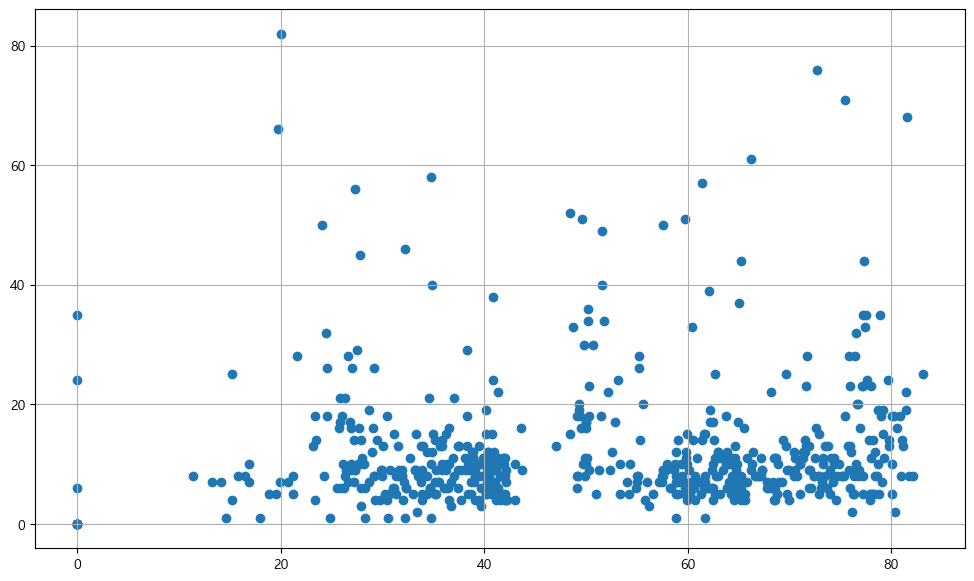

In [676]:
plt.figure(figsize=(12, 7))
plt.grid()
plt.scatter(grp15['속도(km/h)'], grp15['매연Die(%)']);

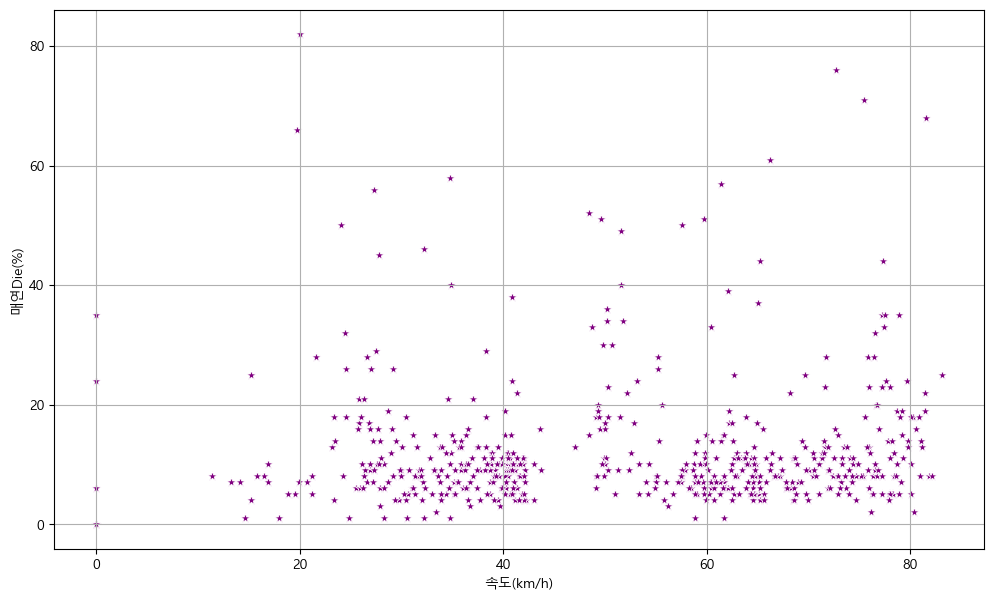

In [677]:
plt.figure(figsize=(12, 7))
plt.grid()
sns.scatterplot(data=grp15, x='속도(km/h)', y='매연Die(%)', s=50, marker='*', color='purple');

### 16\. 매연농도, 배출가스등급별

In [678]:
grp16 = df.groupby(['매연구분인덱스', '매연구분', '등급'], dropna=False).agg({'차량번호':'count'}).reset_index()
grp16 = grp16.rename(columns={'차량번호':'측정건수', '매연구분':'매연(%)'})
grp16.loc[grp16.shape[0]] = [grp16['매연구분인덱스'].max() + 1, '총합', np.nan, grp16['측정건수'].sum()]
grp16 = grp16.drop('매연구분인덱스', axis=1)
grp16

,매연(%),등급,측정건수
0,0이상 5미만,3,276
1,0이상 5미만,4,45
2,0이상 5미만,5,8
3,0이상 5미만,T3,1
4,0이상 5미만,NaN,105
5,5이상 10미만,3,112
6,5이상 10미만,4,74
7,5이상 10미만,5,16
8,5이상 10미만,NaN,73
9,10이상 15미만,3,11


In [679]:
grp16 = df.groupby(['매연구분인덱스', '매연구분', '등급'], dropna=False).agg({'차량번호':'count'}).unstack('등급').reset_index()
grp16 = grp16.rename(columns={'매연구분':'매연(%)', '차량번호':'배출가스등급'})
grp16['합계'] = grp16.iloc[:, 2:].sum(axis=1)
grp16.loc[grp16.shape[0]] = [grp16['매연구분인덱스'].max() + 1, '총합'] + grp16.iloc[:, 2:].sum().to_list()
grp16 = grp16.drop('매연구분인덱스', axis=1)
grp16

C:\Users\kbjung\AppData\Local\Temp\ipykernel_4428\514367651.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  grp16 = grp16.drop('매연구분인덱스', axis=1)


매연(%) 배출가스등급                                   합계
등급                 3      4     5   T3    X    NaN       
0     0이상 5미만 276.00  45.00  8.00 1.00  NaN 105.00 435.00
1    5이상 10미만 112.00  74.00 16.00  NaN  NaN  73.00 275.00
2   10이상 15미만  11.00  27.00  5.00  NaN 2.00  18.00  63.00
3   15이상 20미만   4.00  11.00  2.00  NaN  NaN   1.00  18.00
4   20이상 25미만   3.00   2.00  2.00  NaN  NaN   3.00  10.00
5   25이상 30미만   2.00    NaN   NaN  NaN  NaN    NaN   2.00
6   30이상 35미만   1.00    NaN   NaN  NaN  NaN    NaN   1.00
7   40이상 45미만   2.00    NaN   NaN  NaN  NaN    NaN   2.00
8        45이상    NaN   2.00   NaN  NaN  NaN    NaN   2.00
9          총합 411.00 161.00 33.00 1.00 2.00 200.00 808.00

### 17\. 매연농도, 배기량별

In [680]:
grp17 = df.groupby(['매연구분인덱스', '매연구분', '배기량구분인덱스', '배기량구분'], dropna=False).agg({'차량번호':'count'}).reset_index()
grp17 = grp17.rename(columns={'차량번호':'측정건수', '매연구분':'매연(%)'})
grp17.loc[grp17.shape[0]] = [grp17['매연구분인덱스'].max() + 1, '총합', np.nan, np.nan, grp17['측정건수'].sum()]
grp17 = grp17.drop(['매연구분인덱스', '배기량구분인덱스'], axis=1)
grp17

,매연(%),배기량구분,측정건수
0,0이상 5미만,1천이상 2천미만,74
1,0이상 5미만,2천이상 3천미만,254
2,0이상 5미만,3천이상 4천미만,2
3,0이상 5미만,NaN,105
4,5이상 10미만,1천이상 2천미만,33
5,5이상 10미만,2천이상 3천미만,165
6,5이상 10미만,3천이상 4천미만,4
7,5이상 10미만,NaN,73
8,10이상 15미만,1천이상 2천미만,1
9,10이상 15미만,2천이상 3천미만,44


In [681]:
grp17 = df.groupby(['매연구분인덱스', '매연구분', '배기량구분인덱스', '배기량구분'], dropna=False).agg({'차량번호':'count'}).unstack(['배기량구분인덱스', '배기량구분']).reset_index()
grp17 = grp17.rename(columns={'매연구분':'매연(%)', '차량번호':'배기량(cc)'})
grp17['합계'] = grp17.iloc[:, 2:].sum(axis=1)
grp17.loc[grp17.shape[0]] = [grp17['매연구분인덱스'].max() + 1, '총합'] + grp17.iloc[:, 2:].sum().to_list()
grp17 = grp17.drop(['매연구분인덱스'], axis=1)
grp17.columns = grp17.columns.droplevel(1)
grp17

C:\Users\kbjung\AppData\Local\Temp\ipykernel_4428\1666631741.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  grp17 = grp17.drop(['매연구분인덱스'], axis=1)


매연(%)   배기량(cc)                                합계
배기량구분            1천이상 2천미만 2천이상 3천미만 3천이상 4천미만    NaN       
0        0이상 5미만     74.00    254.00      2.00 105.00 435.00
1       5이상 10미만     33.00    165.00      4.00  73.00 275.00
2      10이상 15미만      1.00     44.00       NaN  18.00  63.00
3      15이상 20미만      2.00     15.00       NaN   1.00  18.00
4      20이상 25미만       NaN      7.00       NaN   3.00  10.00
5      25이상 30미만       NaN      2.00       NaN    NaN   2.00
6      30이상 35미만       NaN      1.00       NaN    NaN   1.00
7      40이상 45미만       NaN      2.00       NaN    NaN   2.00
8           45이상       NaN      2.00       NaN    NaN   2.00
9             총합    110.00    492.00      6.00 200.00 808.00

### 18\. 매연농도, 차량중량별

In [682]:
grp18 = df.groupby(['매연구분인덱스', '매연구분', '총중량구분인덱스', '총중량구분'], dropna=False).agg({'차량번호':'count'}).reset_index()
grp18 = grp18.rename(columns={'총중량구분':'차량중량(kg)', '차량번호':'측정건수', '매연구분':'매연(%)'})
grp18.loc[grp18.shape[0]] = [grp18['매연구분인덱스'].max() + 1, '총합', np.nan, np.nan, grp18['측정건수'].sum()]
grp18 = grp18.drop(['매연구분인덱스', '총중량구분인덱스'], axis=1)
grp18

,매연(%),차량중량(kg),측정건수
0,0이상 5미만,1천이상 2천미만,39
1,0이상 5미만,2천이상 3천미만,206
2,0이상 5미만,3천이상 4천미만,83
3,0이상 5미만,5천이상 6천미만,2
4,0이상 5미만,NaN,105
5,5이상 10미만,1천이상 2천미만,11
6,5이상 10미만,2천이상 3천미만,116
7,5이상 10미만,3천이상 4천미만,71
8,5이상 10미만,5천이상 6천미만,4
9,5이상 10미만,NaN,73


In [683]:
grp18 = df.groupby(['매연구분인덱스', '매연구분', '총중량구분인덱스', '총중량구분'], dropna=False).agg({'차량번호':'count'}).unstack(['총중량구분인덱스', '총중량구분']).reset_index()
grp18 = grp18.rename(columns={'매연구분':'매연(%)', '차량번호':'차량중량(kg)'})
grp18['합계'] = grp18.iloc[:, 2:].sum(axis=1)
grp18.loc[grp18.shape[0]] = [grp18['매연구분인덱스'].max() + 1, '총합'] + grp18.iloc[:, 2:].sum().to_list()
grp18 = grp18.drop(['매연구분인덱스'], axis=1)
grp18.columns = grp18.columns.droplevel(1)
grp18

C:\Users\kbjung\AppData\Local\Temp\ipykernel_4428\2704409092.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  grp18 = grp18.drop(['매연구분인덱스'], axis=1)


매연(%)  차량중량(kg)                                          합계
총중량구분            1천이상 2천미만 2천이상 3천미만 3천이상 4천미만 5천이상 6천미만    NaN       
0        0이상 5미만     39.00    206.00     83.00      2.00 105.00 435.00
1       5이상 10미만     11.00    116.00     71.00      4.00  73.00 275.00
2      10이상 15미만      1.00     25.00     19.00       NaN  18.00  63.00
3      15이상 20미만       NaN     12.00      5.00       NaN   1.00  18.00
4      20이상 25미만       NaN      4.00      3.00       NaN   3.00  10.00
5      25이상 30미만       NaN      2.00       NaN       NaN    NaN   2.00
6      30이상 35미만       NaN      1.00       NaN       NaN    NaN   1.00
7      40이상 45미만       NaN      1.00      1.00       NaN    NaN   2.00
8           45이상       NaN      2.00       NaN       NaN    NaN   2.00
9             총합     51.00    369.00    182.00      6.00 200.00 808.00

### 19\. 매연농도, 종합검사 매연허용기준별

In [684]:
grp19 = df.groupby(['매연구분인덱스', '매연구분', '무부하매연허용치1'], dropna=False).agg({'차량번호':'count'}).reset_index()
grp19 = grp19.rename(columns={'무부하매연허용치1':'매연허용기준(%)', '차량번호':'측정건수(건)', '매연구분':'매연(%)'})
grp19.loc[grp19.shape[0]] = [grp19['매연구분인덱스'].max() + 1, '총합', np.nan, grp19['측정건수(건)'].sum()]
grp19 = grp19.drop('매연구분인덱스', axis=1)
grp19

,매연(%),매연허용기준(%),측정건수(건)
0,0이상 5미만,8.00,79
1,0이상 5미만,15.00,239
2,0이상 5미만,20.00,8
3,0이상 5미만,25.00,3
4,0이상 5미만,NaN,106
5,5이상 10미만,8.00,10
6,5이상 10미만,15.00,167
7,5이상 10미만,20.00,16
8,5이상 10미만,25.00,7
9,5이상 10미만,NaN,75


In [685]:
grp19 = df.groupby(['매연구분인덱스', '매연구분', '무부하매연허용치1'], dropna=False).agg({'차량번호':'count'}).unstack('무부하매연허용치1').reset_index()
grp19 = grp19.rename(columns={'매연구분':'매연(%)', '차량번호':'매연허용기준(%)'})
grp19['합계'] = grp19.iloc[:, 2:].sum(axis=1)
grp19.loc[grp19.shape[0]] = [grp19['매연구분인덱스'].max() + 1, '총합'] + grp19.iloc[:, 2:].sum().to_list()
grp19 = grp19.drop('매연구분인덱스', axis=1)
grp19

C:\Users\kbjung\AppData\Local\Temp\ipykernel_4428\2785198435.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  grp19 = grp19.drop('매연구분인덱스', axis=1)


매연(%) 매연허용기준(%)                               합계
무부하매연허용치1                  8.0   15.0  20.0  25.0    NaN       
0            0이상 5미만     79.00 239.00  8.00  3.00 106.00 435.00
1           5이상 10미만     10.00 167.00 16.00  7.00  75.00 275.00
2          10이상 15미만       NaN  37.00  5.00  2.00  19.00  63.00
3          15이상 20미만       NaN  15.00  2.00   NaN   1.00  18.00
4          20이상 25미만      1.00   4.00  2.00   NaN   3.00  10.00
5          25이상 30미만       NaN   2.00   NaN   NaN    NaN   2.00
6          30이상 35미만       NaN   1.00   NaN   NaN    NaN   1.00
7          40이상 45미만       NaN   2.00   NaN   NaN    NaN   2.00
8               45이상       NaN   2.00   NaN   NaN    NaN   2.00
9                 총합     90.00 469.00 33.00 12.00 204.00 808.00

## NOx 농도별 측정건수 분포

### 20\. NOx농도별 데이터 수량

In [686]:
grp20 = df.groupby(['NOx구분인덱스', 'NOx구분'], dropna=False).agg({'차량번호':'count'}).reset_index()
grp20 = grp20.rename(columns={'차량번호':'측정건수(건)', 'NOx구분':'NOx(ppm)'})
grp20.loc[grp20.shape[0]] = [grp20['NOx구분인덱스'].max() + 1, '총합', grp20['측정건수(건)'].sum()]
grp20 = grp20.drop('NOx구분인덱스', axis=1)
grp20

,NOx(ppm),측정건수(건)
0,0이상 500미만,258
1,500이상 1000미만,395
2,1000이상 1500미만,115
3,1500이상 2000미만,37
4,2000이상 2500미만,2
5,2500이상 3000미만,1
6,총합,808


### 21\. NOx농도, 차종별 데이터 수량

In [687]:
grp21 = df.groupby(['NOx구분인덱스', 'NOx구분', '차종'], dropna=False).agg({'차량번호':'count'}).reset_index()
grp21 = grp21.rename(columns={'차량번호':'측정건수(건)', 'NOx구분':'NOx(ppm)'})
grp21.loc[grp21.shape[0]] = [grp21['NOx구분인덱스'].max() + 1, '총합', np.nan, grp21['측정건수(건)'].sum()]
grp21 = grp21.drop('NOx구분인덱스', axis=1)
grp21

,NOx(ppm),차종,측정건수(건)
0,0이상 500미만,승용,36
1,0이상 500미만,승합,24
2,0이상 500미만,화물,140
3,0이상 500미만,NaN,58
4,500이상 1000미만,승용,58
5,500이상 1000미만,승합,41
6,500이상 1000미만,특수,2
7,500이상 1000미만,화물,195
8,500이상 1000미만,NaN,99
9,1000이상 1500미만,승용,30


In [688]:
grp21 = df.groupby(['NOx구분인덱스', 'NOx구분', '차종'], dropna=False).agg({'차량번호':'count'}).unstack('차종').reset_index()
grp21 = grp21.rename(columns={'NOx구분':'NOx(ppm)', '차량번호':'차종'})
grp21['합계'] = grp21.iloc[:, 2:].sum(axis=1)
grp21.loc[grp21.shape[0]] = [grp21['NOx구분인덱스'].max() + 1, '총합'] + grp21.iloc[:, 2:].sum().to_list()
grp21 = grp21.drop('NOx구분인덱스', axis=1, level=0)
grp21

NOx(ppm)     차종                              합계
차종                    승용    승합   특수     화물    NaN       
0       0이상 500미만  36.00 24.00  NaN 140.00  58.00 258.00
1    500이상 1000미만  58.00 41.00 2.00 195.00  99.00 395.00
2   1000이상 1500미만  30.00 12.00 3.00  36.00  34.00 115.00
3   1500이상 2000미만  18.00  7.00  NaN   3.00   9.00  37.00
4   2000이상 2500미만   1.00  1.00  NaN    NaN    NaN   2.00
5   2500이상 3000미만    NaN  1.00  NaN    NaN    NaN   1.00
6              총합 143.00 86.00 5.00 374.00 200.00 808.00

### 22\. NOx농도, 연식별 데이터 수량

In [689]:
grp22 = df.groupby(['NOx구분인덱스', 'NOx구분', '연식'], dropna=False).agg({'차량번호':'count'}).reset_index()
grp22 = grp22.rename(columns={'차량번호':'측정건수(건)', 'NOx구분':'NOx(ppm)'})
grp22.loc[grp22.shape[0]] = [grp22['NOx구분인덱스'].max() + 1, '총합', np.nan, grp22['측정건수(건)'].sum()]
grp22 = grp22.drop('NOx구분인덱스', axis=1)
grp22

,NOx(ppm),연식,측정건수(건)
0,0이상 500미만,2001.00,1
1,0이상 500미만,2002.00,2
2,0이상 500미만,2003.00,2
3,0이상 500미만,2004.00,4
4,0이상 500미만,2005.00,4
5,0이상 500미만,2006.00,6
6,0이상 500미만,2007.00,11
7,0이상 500미만,2008.00,12
8,0이상 500미만,2009.00,18
9,0이상 500미만,2010.00,12


In [690]:
grp22 = df.groupby(['NOx구분인덱스', 'NOx구분', '연식'], dropna=False).agg({'차량번호':'count'}).unstack('연식').reset_index()
grp22 = grp22.rename(columns={'NOx구분':'NOx(ppm)', '차량번호':'연식(년)'})
grp22['합계'] = grp22.iloc[:, 2:].sum(axis=1)
grp22.loc[grp22.shape[0]] = [grp22['NOx구분인덱스'].max() + 1, '총합'] + grp22.iloc[:, 2:].sum().to_list()
grp22 = grp22.drop('NOx구분인덱스', axis=1)
grp22

C:\Users\kbjung\AppData\Local\Temp\ipykernel_4428\23136108.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  grp22 = grp22.drop('NOx구분인덱스', axis=1)


NOx(ppm)  연식(년)                                                   \
연식                2001.0 2002.0 2003.0 2004.0 2005.0 2006.0 2007.0 2008.0   
0       0이상 500미만   1.00   2.00   2.00   4.00   4.00   6.00  11.00  12.00   
1    500이상 1000미만    NaN    NaN   2.00   1.00   5.00   5.00  11.00  12.00   
2   1000이상 1500미만    NaN    NaN   1.00    NaN    NaN    NaN   3.00   2.00   
3   1500이상 2000미만    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4   2000이상 2500미만    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5   2500이상 3000미만    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6              총합   1.00   2.00   5.00   5.00   9.00  11.00  25.00  26.00   

                                                                          \
연식 2009.0 2010.0 2011.0 2012.0 2013.0 2014.0 2015.0 2016.0 2017.0 2018.0   
0   18.00  12.00  37.00  20.00  12.00  26.00  32.00  26.00  23.00  10.00   
1   17.00  19.00  31.00  38.00  32.00  52.00  44.00  39.00  62.00  25.00   
2    8.00   4.00   9.00  17.00   9.00  10.00  17.00  17.00   7.00  11.00   
3     NaN   5.00   5.00   1.00   1.00   2.00   3.00   7.00   3.00  10.00   
4     NaN    NaN   1.00    NaN    NaN    NaN   1.00    NaN    NaN    NaN   
5     NaN    NaN   1.00    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6   43.00  40.00  84.00  76.00  54.00  90.00  97.00  89.00  95.00  56.00   

       합계  
연식         
0  258.00  
1  395.00  
2  115.00  
3   37.00  
4    2.00  
5    1.00  
6  808.00

### 23\. NOx농도, 측정속도 데이터 분포

In [691]:
grp23 = df.groupby(['NOx구분인덱스', 'NOx구분', '속도구분인덱스', '속도구분'], dropna=False).agg({'차량번호':'count'}).reset_index()
grp23 = grp23.rename(columns={'차량번호':'측정건수(건)', 'NOx구분':'NOx(ppm)', '속도구분':'속도(km/h)'})
grp23.loc[grp23.shape[0]] = [grp23['NOx구분인덱스'].max() + 1, '총합', np.nan, np.nan, grp23['측정건수(건)'].sum()]
grp23 = grp23.drop(['NOx구분인덱스', '속도구분인덱스'], axis=1)
grp23

,NOx(ppm),속도(km/h),측정건수(건)
0,0이상 500미만,0이상 10미만,2
1,0이상 500미만,30이상 40미만,1
2,0이상 500미만,40이상 50미만,24
3,0이상 500미만,50이상 60미만,231
4,500이상 1000미만,0이상 10미만,3
5,500이상 1000미만,30이상 40미만,2
6,500이상 1000미만,40이상 50미만,34
7,500이상 1000미만,50이상 60미만,356
8,1000이상 1500미만,0이상 10미만,2
9,1000이상 1500미만,30이상 40미만,1


In [692]:
grp23 = df.groupby(['NOx구분인덱스', 'NOx구분', '속도구분인덱스', '속도구분'], dropna=False).agg({'차량번호':'count'}).unstack(['속도구분인덱스', '속도구분']).reset_index()
grp23 = grp23.rename(columns={'NOx구분':'NOx(ppm)', '차량번호':'속도(km/h)'})
grp23['합계'] = grp23.iloc[:, 2:].sum(axis=1)
grp23.loc[grp23.shape[0]] = [grp23['NOx구분인덱스'].max() + 1, '총합'] + grp23.iloc[:, 2:].sum().to_list()
grp23 = grp23.drop(['NOx구분인덱스'], axis=1)
grp23.columns = grp23.columns.droplevel(1)
grp23

C:\Users\kbjung\AppData\Local\Temp\ipykernel_4428\155648522.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  grp23 = grp23.drop(['NOx구분인덱스'], axis=1)


NOx(ppm) 속도(km/h)                                   합계
속도구분                0이상 10미만 30이상 40미만 40이상 50미만 50이상 60미만       
0         0이상 500미만     2.00      1.00     24.00    231.00 258.00
1      500이상 1000미만     3.00      2.00     34.00    356.00 395.00
2     1000이상 1500미만     2.00      1.00      2.00    110.00 115.00
3     1500이상 2000미만      NaN      1.00      2.00     34.00  37.00
4     2000이상 2500미만      NaN       NaN      1.00      1.00   2.00
5     2500이상 3000미만      NaN       NaN       NaN      1.00   1.00
6                총합     7.00      5.00     63.00    733.00 808.00

### 24\. NOx농도, 배출가스등급별

In [693]:
grp24 = df.groupby(['NOx구분인덱스', 'NOx구분', '등급'], dropna=False).agg({'차량번호':'count'}).reset_index()
grp24 = grp24.rename(columns={'차량번호':'측정건수(건)', 'NOx구분':'NOx(ppm)'})
grp24.loc[grp24.shape[0]] = [grp24['NOx구분인덱스'].max() + 1, '총합', np.nan, grp24['측정건수(건)'].sum()]
grp24 = grp24.drop('NOx구분인덱스', axis=1)
grp24

,NOx(ppm),등급,측정건수(건)
0,0이상 500미만,3,111
1,0이상 500미만,4,69
2,0이상 500미만,5,18
3,0이상 500미만,X,2
4,0이상 500미만,NaN,58
5,500이상 1000미만,3,211
6,500이상 1000미만,4,71
7,500이상 1000미만,5,14
8,500이상 1000미만,NaN,99
9,1000이상 1500미만,3,65


In [694]:
grp24 = df.groupby(['NOx구분인덱스', 'NOx구분', '등급'], dropna=False).agg({'차량번호':'count'}).unstack('등급').reset_index()
grp24['합계'] = grp24.iloc[:, 2:].sum(axis=1)
grp24.loc[grp24.shape[0]] = [grp24['NOx구분인덱스'].max() + 1, '총합'] + grp24.iloc[:, 2:].sum().to_list()
grp24 = grp24.drop('NOx구분인덱스', axis=1)
grp24 = grp24.rename(columns={'NOx구분':'NOx(ppm)', '차량번호':'등급'})
grp24

C:\Users\kbjung\AppData\Local\Temp\ipykernel_4428\1612651757.py:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  grp24 = grp24.drop('NOx구분인덱스', axis=1)


NOx(ppm)     등급                                   합계
등급                     3      4     5   T3    X    NaN       
0       0이상 500미만 111.00  69.00 18.00  NaN 2.00  58.00 258.00
1    500이상 1000미만 211.00  71.00 14.00  NaN  NaN  99.00 395.00
2   1000이상 1500미만  65.00  14.00  1.00 1.00  NaN  34.00 115.00
3   1500이상 2000미만  23.00   5.00   NaN  NaN  NaN   9.00  37.00
4   2000이상 2500미만   1.00   1.00   NaN  NaN  NaN    NaN   2.00
5   2500이상 3000미만    NaN   1.00   NaN  NaN  NaN    NaN   1.00
6              총합 411.00 161.00 33.00 1.00 2.00 200.00 808.00

### 25\. NOx농도, 배기량별

In [695]:
grp25 = df.groupby(['NOx구분인덱스', 'NOx구분', '배기량구분인덱스', '배기량구분'], dropna=False).agg({'차량번호':'count'}).reset_index()
grp25 = grp25.rename(columns={'차량번호':'측정건수(건)', 'NOx구분':'NOx(ppm)'})
grp25.loc[grp25.shape[0]] = [grp25['NOx구분인덱스'].max() + 1, '총합', np.nan, np.nan, grp25['측정건수(건)'].sum()]
grp25 = grp25.drop(['NOx구분인덱스', '배기량구분인덱스'], axis=1)
grp25 = grp25.rename(columns={'NOx구분':'NOx(ppm)', '차량번호':'배기량(cc)', '배기량구분':'배기량(cc)'})
grp25

,NOx(ppm),배기량(cc),측정건수(건)
0,0이상 500미만,1천이상 2천미만,45
1,0이상 500미만,2천이상 3천미만,154
2,0이상 500미만,3천이상 4천미만,1
3,0이상 500미만,NaN,58
4,500이상 1000미만,1천이상 2천미만,47
5,500이상 1000미만,2천이상 3천미만,244
6,500이상 1000미만,3천이상 4천미만,5
7,500이상 1000미만,NaN,99
8,1000이상 1500미만,1천이상 2천미만,15
9,1000이상 1500미만,2천이상 3천미만,66


In [696]:
grp25 = df.groupby(['NOx구분인덱스', 'NOx구분', '배기량구분인덱스', '배기량구분'], dropna=False).agg({'차량번호':'count'}).unstack(['배기량구분인덱스', '배기량구분']).reset_index()
grp25 = grp25.rename(columns={'NOx구분':'NOx(ppm)', '차량번호':'배기량(cc)'})
grp25['합계'] = grp25.iloc[:, 2:].sum(axis=1)
grp25.loc[grp25.shape[0]] = [grp25['NOx구분인덱스'].max() + 1, '총합'] + grp25.iloc[:, 2:].sum().to_list()
grp25 = grp25.drop(['NOx구분인덱스'], axis=1)
grp25.columns = grp25.columns.droplevel(1)
grp25

C:\Users\kbjung\AppData\Local\Temp\ipykernel_4428\472820597.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  grp25 = grp25.drop(['NOx구분인덱스'], axis=1)


NOx(ppm)   배기량(cc)                                합계
배기량구분                1천이상 2천미만 2천이상 3천미만 3천이상 4천미만    NaN       
0          0이상 500미만     45.00    154.00      1.00  58.00 258.00
1       500이상 1000미만     47.00    244.00      5.00  99.00 395.00
2      1000이상 1500미만     15.00     66.00       NaN  34.00 115.00
3      1500이상 2000미만      3.00     25.00       NaN   9.00  37.00
4      2000이상 2500미만       NaN      2.00       NaN    NaN   2.00
5      2500이상 3000미만       NaN      1.00       NaN    NaN   1.00
6                 총합    110.00    492.00      6.00 200.00 808.00

### 26\. NOx농도, 차량중량별

In [697]:
grp26 = df.groupby(['NOx구분인덱스', 'NOx구분', '총중량구분인덱스', '총중량구분'], dropna=False).agg({'차량번호':'count'}).reset_index()
grp26 = grp26.rename(columns={'총중량구분':'차량중량(kg)', '차량번호':'측정건수(건)', '차량중량구분':'차량중량(kg)'})
grp26.loc[grp26.shape[0]] = [grp26['NOx구분인덱스'].max() + 1, '총합', np.nan, np.nan, grp26['측정건수(건)'].sum()]
grp26 = grp26.drop(['NOx구분인덱스', '총중량구분인덱스'], axis=1)
grp26

,NOx구분,차량중량(kg),측정건수(건)
0,0이상 500미만,1천이상 2천미만,18
1,0이상 500미만,2천이상 3천미만,122
2,0이상 500미만,3천이상 4천미만,59
3,0이상 500미만,5천이상 6천미만,1
4,0이상 500미만,NaN,58
5,500이상 1000미만,1천이상 2천미만,24
6,500이상 1000미만,2천이상 3천미만,168
7,500이상 1000미만,3천이상 4천미만,99
8,500이상 1000미만,5천이상 6천미만,5
9,500이상 1000미만,NaN,99


In [698]:
grp26 = df.groupby(['NOx구분인덱스', 'NOx구분', '총중량구분인덱스', '총중량구분'], dropna=False).agg({'차량번호':'count'}).unstack(['총중량구분인덱스', '총중량구분']).reset_index()
grp26 = grp26.rename(columns={'NOx구분':'NOx(ppm)', '차량번호':'차량중량(kg)'})
grp26['합계'] = grp26.iloc[:, 2:].sum(axis=1)
grp26.loc[grp26.shape[0]] = [grp26['NOx구분인덱스'].max() + 1, '총합'] + grp26.iloc[:, 2:].sum().to_list()
grp26 = grp26.drop(['NOx구분인덱스'], axis=1)
grp26.columns = grp26.columns.droplevel(1)
grp26

C:\Users\kbjung\AppData\Local\Temp\ipykernel_4428\2209842798.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  grp26 = grp26.drop(['NOx구분인덱스'], axis=1)


NOx(ppm)  차량중량(kg)                                          합계
총중량구분                1천이상 2천미만 2천이상 3천미만 3천이상 4천미만 5천이상 6천미만    NaN       
0          0이상 500미만     18.00    122.00     59.00      1.00  58.00 258.00
1       500이상 1000미만     24.00    168.00     99.00      5.00  99.00 395.00
2      1000이상 1500미만      6.00     52.00     23.00       NaN  34.00 115.00
3      1500이상 2000미만      3.00     24.00      1.00       NaN   9.00  37.00
4      2000이상 2500미만       NaN      2.00       NaN       NaN    NaN   2.00
5      2500이상 3000미만       NaN      1.00       NaN       NaN    NaN   1.00
6                 총합     51.00    369.00    182.00      6.00 200.00 808.00

## 결과 출력

In [699]:
today_date = dt.datetime.today().strftime("%Y%m%d")
today_date

'20231023'

In [700]:
with pd.ExcelWriter(os.path.join(an_fold, f'통합측정기_측정결과_분석(제공차량제원)({today_date}).xlsx')) as writer:
    grp1.to_excel(writer, sheet_name='1_매연_경유_차종별', index=False)
    grp2.to_excel(writer, sheet_name='2_매연_경유_연식별', index=False)
    grp3.to_excel(writer, sheet_name='3_매연_경유_등급별', index=False)
    grp4.to_excel(writer, sheet_name='4_매연_경유_배기량별', index=False)
    grp5.to_excel(writer, sheet_name='5_매연_경유_차량중량별', index=False)
    grp6.to_excel(writer, sheet_name='6_매연_경유_매연허용기준별', index=False)

    grp7.to_excel(writer, sheet_name='7_NOx_경유_차종별', index=False)
    grp8.to_excel(writer, sheet_name='8_NOx_경유_연식별', index=False)
    grp9.to_excel(writer, sheet_name='9_NOx_경유_등급별', index=False)
    grp10.to_excel(writer, sheet_name='10_NOx_경유_배기량별', index=False)
    grp11.to_excel(writer, sheet_name='11_NOx_경유_차량중량별', index=False)

    grp12.to_excel(writer, sheet_name='12_매연농도별', index=False)
    grp13.to_excel(writer, sheet_name='13_매연농도_차종별', index=True)
    grp14.to_excel(writer, sheet_name='14_매연농도_연식별', index=True)
    grp15.to_excel(writer, sheet_name='15_매연농도_측정속도별', index=False)
    grp16.to_excel(writer, sheet_name='16_매연농도_등급별', index=True)
    grp17.to_excel(writer, sheet_name='17_매연농도_배기량별', index=True)
    grp18.to_excel(writer, sheet_name='18_매연농도_차량중량별', index=True)
    grp19.to_excel(writer, sheet_name='19_매연농도_매연허용기준별', index=True)

    grp20.to_excel(writer, sheet_name='20_NOx농도별', index=False)
    grp21.to_excel(writer, sheet_name='21_NOx농도_차종별', index=True)
    grp22.to_excel(writer, sheet_name='22_NOx농도_연식별', index=True)
    grp23.to_excel(writer, sheet_name='23_NOx농도_측정속도별', index=True)
    grp24.to_excel(writer, sheet_name='24_NOx농도_등급별', index=True)
    grp25.to_excel(writer, sheet_name='25_NOx농도_배기량별', index=True)
    grp26.to_excel(writer, sheet_name='26_NOx농도_차량중량별', index=True)

In [701]:
sec = time.time() - start_time
print(str(dt.timedelta(seconds=sec)).split('.')[0])

0:00:07


# End